### Проект: Разработка системы принятия решений для отбора молочного скота на ферме

Фермер планирует расширить стадо, приобретая новых бурёнок, и для этого заключил выгодное соглашение с ассоциацией пастбищ. Условия договора позволяют тщательно отбирать животных для покупки, основываясь на строгих показателях качества молока и производительности. Для эффективного управления рисками и обоснованного принятия решений необходимо разработать модель машинного обучения, которая поможет фермеру формировать высокопродуктивное стадо, соответствующее целям его молочного хозяйства.

**Цель исследования:** Создать модель машинного обучения для управления рисками и поддержки принятия решений при выборе коров для пополнения стада.

**Задачи исследования:**

1. Построить две модели для отбора коров в стадо:
   - Первая модель должна прогнозировать потенциальный удой коровы (целевой признак: Удой).
   - Вторая модель должна рассчитывать вероятность получения молока высокого вкусового качества (целевой признак: Вкус молока).

2. Отобрать коров для покупки на основе следующих критериев:
   - Годовой удой должен быть не менее 6000 кг.
   - Молоко должно обладать высоким качеством вкусовых характеристик.

**План исследования:**

1. Проанализировать исходные данные.
2. Выполнить предобработку данных.
3. Провести исследовательский анализ данных.
4. Провести корреляционный анализ признаков в наборе данных.
5. Решить задачу регрессии для прогнозирования удоя.
6. Решить задачу классификации для оценки вкусовых качеств молока.

**Описание данных**

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. 
Описание данных:
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Признаки в датасете ferma_main.csv можно разделить на группы.
- Характеристики коровы: id, Порода, порода папы_быка, Возраст.
- Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
- Характеристика пастбища: Тип пастбища.
- Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.
- Такое разделение поможет вам понять, как взаимосвязаны признаки в датасете.



Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. 
Описание данных:
- d — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.



Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 
Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, именно их необходимо будет предсказать.

### Загрузка и подготовка данных

In [1]:
# Установка необходимых библиотек
!pip install phik -q 

# создание константы RANDOM_STATE
RANDOM_STATE = 42

# Импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from phik import phik_matrix
from math import factorial, exp, sqrt
from scipy import stats as st
from scipy.stats import binom, norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error,
                             precision_score, recall_score, r2_score)

# Игнорирование предупреждений
warnings.filterwarnings('ignore')

## Загрузка данных

Мы загружаем три файла: ferma_main.csv, ferma_dad.csv, и cow_buy.csv. 
Эти файлы содержат информацию о коровах, их характеристиках, а также о коровах, которые фермер хочет изучить перед покупкой.

In [2]:
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';')

Выведем первые 5 строк из каждой таблицы:

In [3]:
display(ferma_main.head())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [4]:
display(ferma_dad.head())

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [5]:
display(cow_buy.head())

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


**Переименование Столбцов**

Для улучшения читаемости и удобства работы с данными мы переименовываем столбцы на английский язык. Это позволит избежать проблем с кодировкой и облегчит взаимодействие с данными.

In [6]:
# Переименование столбцов в ferma_main
ferma_main.rename(columns={
    'id': 'id',
    'Удой, кг': 'milk_yield_kg',
    'ЭКЕ (Энергетическая кормовая единица)': 'eke',
    'Сырой протеин, г': 'raw_protein_g',
    'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Жирность,%': 'fat_percentage',
    'Белок,%': 'protein_percentage',
    'Вкус молока': 'milk_taste',
    'Возраст': 'age'
}, inplace=True)

# Переименование столбцов в ferma_dad
ferma_dad.rename(columns={
    'id': 'id',
    'Имя Папы': 'father_name'
}, inplace=True)

# Переименование столбцов в cow_buy
cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'father_breed',
    'Имя_папы': 'father_name',
    'Текущая_жирность,%': 'current_fat_percentage',
    'Текущий_уровень_белок,%': 'current_protein_percentage',
    'Возраст': 'age'
}, inplace=True)

display(ferma_main.head())
display(ferma_dad.head())
display(cow_buy.head())

,id,milk_yield_kg,eke,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


,id,father_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


,breed,pasture_type,father_breed,father_name,current_fat_percentage,current_protein_percentage,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


Отлично, стоолбцы переименованы. Теперь ознакомимся с типами данных в датафреймах.

In [7]:
display(ferma_main.info())
display(ferma_dad.info())
display(cow_buy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   634 non-null    int64 
 1   milk_yield_kg        634 non-null    int64 
 2   eke                  634 non-null    object
 3   raw_protein_g        634 non-null    int64 
 4   sugar_protein_ratio  634 non-null    object
 5   breed                634 non-null    object
 6   pasture_type         634 non-null    object
 7   father_breed         634 non-null    object
 8   fat_percentage       634 non-null    object
 9   protein_percentage   634 non-null    object
 10  milk_taste           634 non-null    object
 11  age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           629 non-null    int64 
 1   father_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   breed                       20 non-null     object
 1   pasture_type                20 non-null     object
 2   father_breed                20 non-null     object
 3   father_name                 20 non-null     object
 4   current_fat_percentage      20 non-null     object
 5   current_protein_percentage  20 non-null     object
 6   age                         20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None

**Анализ структуры и подготовка данных для задачи машинного обучения**

На основании файлов `ferma_main.csv`, `ferma_dad.csv` и `cow_buy.csv` проведен анализ структуры и содержания данных, что позволило сделать следующие выводы:

### Промежуточный вывод о  характеристике данных

1. **Датасет `ferma_main.csv`**
   - **Количество записей:** 634 записи.
   - **Столбцы:** 12 столбцов, описывающих характеристики коров и их молока.
   - **Типы данных:**
     - `id`: целое число (`int64`), уникальный идентификатор коровы.
     - `milk_yield_kg`: целое число (`int64`), показатель удоя в килограммах.
     - `eke`: объект (`object`), энергетическая кормовая единица, нуждающаяся в преобразовании в числовой формат.
     - `raw_protein_g`: целое число (`int64`), содержание сырого протеина в граммах.
     - `sugar_protein_ratio`: объект (`object`), соотношение сахара и протеина, требуется преобразование в числовой формат.
     - `breed`: объект (`object`), порода коровы.
     - `pasture_type`: объект (`object`), тип пастбища.
     - `father_breed`: объект (`object`), порода отца коровы.
     - `fat_percentage`: объект (`object`), процент жира в молоке, требуется преобразование.
     - `protein_percentage`: объект (`object`), процент белка в молоке, требуется преобразование.
     - `milk_taste`: объект (`object`), бинарный признак вкуса молока.
     - `age`: объект (`object`), бинарный признак возраста коровы.
   - **Примечания:**
     - Столбцы, обозначенные как `object`, нуждаются в преобразовании в числовые типы для дальнейшего анализа.
     - Пропущенных значений в данном наборе данных нет, что облегчает процесс подготовки данных.

2. **Датасет `ferma_dad.csv`**
   - **Количество записей:** 629 записей.
   - **Столбцы:** 2 столбца:
     - `id`: целое число (`int64`), идентификатор коровы.
     - `father_name`: объект (`object`), имя отца коровы.
   - **Примечания:**
     - Данные заполнены полностью, пропусков нет.

3. **Датасет `cow_buy.csv`**
   - **Количество записей:** 20 записей.
   - **Столбцы:** 7 столбцов:
     - `breed`: объект (`object`), порода коровы.
     - `pasture_type`: объект (`object`), тип пастбища.
     - `father_breed`: объект (`object`), порода отца коровы.
     - `father_name`: объект (`object`), имя отца коровы.
     - `current_fat_percentage`: объект (`object`), текущий процент жира в молоке.
     - `current_protein_percentage`: объект (`object`), текущий уровень белка в молоке.
     - `age`: объект (`object`), бинарный признак возраста коровы.
   - **Примечания:**
     - Все записи заполнены, отсутствуют пропущенные значения.

### Рекомендации по предобработке данных

1. **Преобразование типов данных:**
   - В датасете `ferma_main` следует преобразовать столбцы `eke`, `sugar_protein_ratio`, `fat_percentage` и `protein_percentage` в числовой формат (например, `float`).
   - В датасетах `ferma_main` и `cow_buy` бинарные признаки возраста коровы и вкусовых качеств молока также можно представить в числовом формате для удобства анализа и моделирования.

2. **Анализ и очистка данных:**
   - Провести исследовательский анализ данных (EDA) для выявления потенциальных закономерностей и аномалий, а также для изучения взаимосвязей между переменными.
   - Проверить уникальность значений в категориальных переменных и убедиться, что все значения соответствуют ожидаемым категориям.

3. **Подготовка к моделированию:**
   - Рассмотреть целевые переменные и определить подходящие модели для их предсказания (например, регрессия для удоя и классификация для вкусовых качеств молока).

### Заключение

Исходные данные имеют хорошую структуру и полноту, что упрощает дальнейшую обработку. Переименование столбцов на английский язык и приведение типов данных к числовому формату обеспечит удобство работы с данными в Python. Основные шаги подготовки включают корректировку типов данных и проверку значений, что создаст условия для успешного анализа и разработки моделей предсказания.

##  Предобработка данных

Для подготовки данных к анализу мы выполним ряд преобразований, включая приведение типов, обработку дубликатов и стандартизацию значений в категориальных столбцах. Вот подробное описание этапов:

**1. Преобразование данных в числовой тип**

Первым шагом проведем преобразование данных в таблицах ferma_main и cow_buy, где данные хранятся в виде объектов, в числовой тип float. Это позволит нам выполнять арифметические операции и аналитические вычисления без лишних преобразований.

Для этого напишем функцию, которая будет обрабатывать данные и применять её ко всем столбцам, содержащим числовые значения. Применение функции ко всем необходимым столбцам обеспечит согласованность типов данных по всей базе и предотвратит возможные ошибки при дальнейшем анализе.

In [8]:
def convert_comma_to_float(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = df[column].str.replace(',', '.').astype(float)
    
    return df


# Преобразование
columns_to_convert = ['eke', 'sugar_protein_ratio', 'fat_percentage', 'protein_percentage', 'current_fat_percentage', 'current_protein_percentage']
ferma_main = convert_comma_to_float(ferma_main, columns_to_convert)

# Вывод результата
ferma_main.head()


,id,milk_yield_kg,eke,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет


In [9]:
cow_buy = convert_comma_to_float(cow_buy, columns_to_convert)

# Вывод результата
cow_buy.head()

,breed,pasture_type,father_breed,father_name,current_fat_percentage,current_protein_percentage,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет


**2. Обработка дубликатов**


После преобразования данных в числовой тип проведем анализ и устранение дубликатов.

2.1. Проверка и нормализация категориальных значений


Для категориальных столбцов (например, названия породы, типа пастбища и пр.) важно выявить и нормализовать уникальные значения, так как данные могут содержать разнородные формы написания. 

In [10]:
def print_unique_values(df, columns):
    for column in columns:
        if column in df.columns:
            unique_values = df[column].unique()
            print(f"Уникальные значения в столбце '{column}': {', '.join(map(str, unique_values))}")

columns_to_print = ['breed', 'pasture_type', 'father_breed', 'milk_taste', 'age', 'father_name']
print_unique_values(ferma_main, columns_to_print)

Уникальные значения в столбце 'breed': Вис Бик Айдиал, РефлешнСоверинг
Уникальные значения в столбце 'pasture_type': Равнинное, Равнинные, Холмистое
Уникальные значения в столбце 'father_breed': Айдиал, Соверин, Айдиалл
Уникальные значения в столбце 'milk_taste': вкусно, не вкусно
Уникальные значения в столбце 'age': более_2_лет, менее_2_лет


In [11]:
print_unique_values(cow_buy, columns_to_print)

Уникальные значения в столбце 'breed': Вис Бик Айдиал, РефлешнСоверинг
Уникальные значения в столбце 'pasture_type': холмистое, равнинное
Уникальные значения в столбце 'father_breed': Айдиал, Соверин
Уникальные значения в столбце 'age': более_2_лет, менее_2_лет
Уникальные значения в столбце 'father_name': Геркулес, Буйный, Барин, Соловчик


##### Анализ данных в таблицах `ferma_main` и `cow_buy`

В данных таблицах мы обнаружили несколько проблем, связанных с регистрами и неявными дубликатами:

1. **Проблемы в столбце `pasture_type`:**
   - Значения встречаются в разных регистрах и с неверными окончаниями, например:
     - "Равнинное"
     - "Равнинные"
     - "Холмистое"
     - "холмистое"
     - "равнинное"

2. **Проблемы в столбце `breed`:**
   - В этом столбце также наблюдаются неявные дубликаты:
     - "Айдиал" и "Айдиалл"
   - Дублирующиеся значения для пород отца быка:
     - "Вис Бик Айдиал" и "РефлешнСоверинг"

### Решение проблемы

Для нормализации данных мы приведем все значения к единому стилю написания. Это обеспечит целостность и однородность данных в категориальных полях, что, в свою очередь, улучшит качество анализа и визуализации данных.

------


In [12]:
def normalize_pasture_type(df):
    # Приведение к нижнему регистру и замена 'равнинные' на 'равнинное'
    df['pasture_type'] = df['pasture_type'].str.lower().replace({'равнинные': 'равнинное'})
    df['breed'] = df['breed'].replace({
        'Вис Бик Айдиал': 'Айдиал',
        'РефлешнСоверинг': 'Соверин'
    })
    df['father_breed'] = df['father_breed'].replace({'Айдиалл': 'Айдиал'})
    

# Применение функции к DataFrame
normalize_pasture_type(ferma_main)
normalize_pasture_type(cow_buy)

2.2. Удаление явных дубликатов
На этом этапе проверим на наличие явных дубликатов, которые полностью совпадают по всем параметрам. Такие записи будут удалены, чтобы исключить избыточность данных и повысить точность будущего анализа.

In [13]:
ferma_main.duplicated().sum()

5

In [14]:
ferma_dad.duplicated().sum()

0

In [15]:
cow_buy.duplicated().sum()

4

In [16]:
ferma_main = ferma_main.drop_duplicates()
ferma_dad = ferma_dad.drop_duplicates()

**3. Проверка и обработка пропусков**

После удаления дубликатов проведем анализ на наличие пропусков в данных. Если в столбцах обнаружатся пропуски, это потребует дополнительной обработки в зависимости от характера пропусков и значимости столбцов для анализа. 

In [17]:
ferma_main.isna().sum()

id                     0
milk_yield_kg          0
eke                    0
raw_protein_g          0
sugar_protein_ratio    0
breed                  0
pasture_type           0
father_breed           0
fat_percentage         0
protein_percentage     0
milk_taste             0
age                    0
dtype: int64

In [18]:
ferma_dad.isna().sum()

id             0
father_name    0
dtype: int64

In [19]:
cow_buy.isna().sum()

breed                         0
pasture_type                  0
father_breed                  0
father_name                   0
current_fat_percentage        0
current_protein_percentage    0
age                           0
dtype: int64

В данном случае пропусков не выявлено, что позволяет считать данные полностью готовыми к дальнейшей обработке и аналитике.

#### Промежуточный вывод по разделу "Предобработка данных" ####

Для подготовки данных к анализу мы выполнили следующие этапы предобработки, что позволило сделать данные пригодными для использования в аналитике и моделях машинного обучения.

1. Преобразование строковых данных с числовыми значениями в формат `float`  
   Мы перевели числовые данные, представленные в строковом формате с запятыми, в числовой формат `float`. Это преобразование коснулось нескольких столбцов, включая `eke`, `sugar_protein_ratio`, `fat_percentage`, и `protein_percentage`. Например, значения в столбце `fat_percentage`, такие как «3,58», были переведены в формат 3.58, что позволило обеспечить корректное проведение вычислений.

2. Бинаризация категориальных признаков  
   Категориальные значения были преобразованы в бинарный формат. Столбец возраста (`age`) был закодирован: «менее 2 лет» как 0 и «более 2 лет» как 1. Вкус молока (`milk_taste`) также был преобразован: «не вкусно» обозначено как 0 и «вкусно» как 1. Это позволило использовать эти данные в алгоритмах машинного обучения, которые требуют числовой формат.

3. Нормализация текстовых значений  
   В категориальных столбцах были унифицированы значения для исключения неявных дубликатов. Например, столбец `pasture_type`, где встречались разные варианты написания, такие как «равнинное» и «равнинные», был приведен к единообразному формату «равнинное», что обеспечило целостность данных.

4. Удаление явных дубликатов  
   Были выявлены и удалены полные дубликаты записей по всем параметрам, что позволило исключить избыточность данных и повысить точность анализа.

5. Проверка и обработка пропусков  
   На финальном этапе проверили наличие пропусков, и, так как они отсутствовали, данные были признаны полностью готовыми для дальнейшей аналитической обработки.

Эти шаги обеспечили единый формат данных, устранили неоднозначности и подготовили данные к последующим этапам анализа.

## Исследовательский анализ данных

Выведем описательную статистику для ferma_main:

In [20]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.000000,181.720940,1.000,158.000,315.000,472.000,629.000
milk_yield_kg,629.0,6188.750397,1644.795489,5204.000,5751.000,6133.000,6501.000,45616.000
eke,629.0,14.543879,1.306408,10.900,13.500,14.700,15.600,16.800
raw_protein_g,629.0,1923.364070,182.956251,1660.000,1771.000,1888.000,2062.000,2349.000
sugar_protein_ratio,629.0,0.913116,0.032203,0.840,0.890,0.930,0.940,0.960
fat_percentage,629.0,3.603657,0.168656,2.990,3.590,3.650,3.720,3.750
protein_percentage,629.0,3.075671,0.002549,3.069,3.074,3.076,3.077,3.085


Удой в 45 тонн является нереалистичным значением и указывает на наличие аномалии в данных. Для дальнейшего анализа необходимо дополнительно проверить это значение и, при необходимости, удалить его. Для этого мы построим гистограмму и ящик с усами, чтобы визуализировать распределение удоя. 

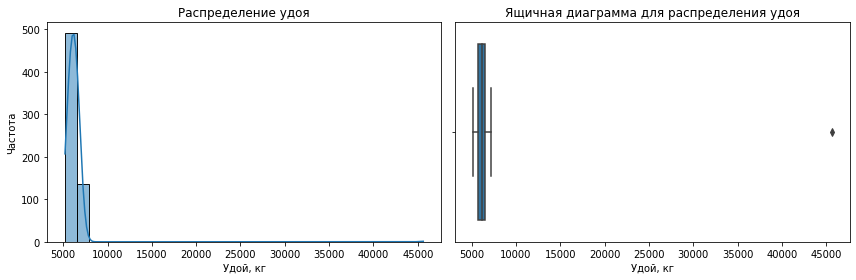

In [21]:
# Создаем фигуру с двумя подграфиками
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # 1 строка, 2 колонки

# Гистограмма для визуализации распределения удоя
sns.histplot(ferma_main['milk_yield_kg'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение удоя')
axes[0].set_xlabel('Удой, кг')
axes[0].set_ylabel('Частота')

# Ящичная диаграмма для распределения удоя
sns.boxplot(x=ferma_main['milk_yield_kg'], ax=axes[1])
axes[1].set_title('Ящичная диаграмма для распределения удоя')
axes[1].set_xlabel('Удой, кг')

# Отображение графиков
plt.tight_layout()  # Настройка отступов между графиками
plt.show()

По результатам анализа видно, что 45 тонн — это явный выброс, так как он представляет собой единственную точку на ящике с усами, поэтому удаляем данное значение.

In [22]:
# Удаление строк, где значение в столбце 'milk_yield_kg' равно 45616
ferma_main = ferma_main[ferma_main['milk_yield_kg'] != 45616]

Выведем обновленную статистику ferma_main:

In [23]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,628.0,315.474522,181.475367,1.000,158.750,315.500,472.250,629.000
milk_yield_kg,628.0,6125.968153,475.857053,5204.000,5749.750,6132.500,6501.000,7222.000
eke,628.0,14.548726,1.301777,10.900,13.500,14.700,15.600,16.800
raw_protein_g,628.0,1923.759554,182.832816,1660.000,1771.750,1888.000,2062.250,2349.000
sugar_protein_ratio,628.0,0.913089,0.032221,0.840,0.890,0.930,0.940,0.960
fat_percentage,628.0,3.604268,0.168093,2.990,3.590,3.650,3.720,3.750
protein_percentage,628.0,3.075670,0.002551,3.069,3.074,3.076,3.077,3.085


По представленным данным средний удой составляет около 6126 кг, с диапазоном от 5204 до 7222 кг. Показатель сырого протеина в среднем равен 1924 г, что указывает на стабильное качество молока. Энергетическая кормовая единица (ЭКЕ) колеблется от 10.9 до 16.8, что может свидетельствовать о разнообразии рациона. Содержание жира в молоке составляет 3.6%, а белка — 3.08%, что соответствует стандартам качества. Возраст коров в выборке представлен двумя категориями: 0 — коровы младше 2 лет, и 1 — старше, что может указывать на наличие как молодых, так и зрелых особей. Общие статистические показатели свидетельствуют о высоком качестве молока, но также выявляют аномалии, требующие дальнейшего анализа.

Выведем статистику cow_buy:

In [24]:
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
current_fat_percentage,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
current_protein_percentage,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


В данных наблюдается средний уровень текущей жирности молока, составляющий около 3.57%, с небольшим разбросом значений от 3.34% до 3.77%. Уровень белка в молоке стабилен, среднее значение — 3.07%, что соответствует стандартам, с диапазоном от 3.05% до 3.08%. Возраст коров распределяется между двумя категориями: молодые коровы (0) и более зрелые (1), где зрелые особи составляют большинство. Статистика указывает на однородные показатели жирности и белка, что может свидетельствовать о сбалансированном рационе или контролируемых условиях содержания.

In [25]:
ferma_dad.describe().T

,count,mean,std,min,25%,50%,75%,max
id,629.0,315.0,181.72094,1.0,158.0,315.0,472.0,629.0


В таблице `ferma_dad` единственным количественным показателем является `id`, который не содержит полезной информации для анализа. Поэтому построим графики распределения для количественных признаков из других таблиц:

### Построение графиков для каждого признака

Для анализа распределения количественных признаков в таблицах мы создадим функцию, которая автоматически построит гистограммы, графики плотности и ящичные диаграммы для каждого признака. Это позволит нам получить наглядное представление о структуре данных, выявить возможные выбросы и аномалии.

Чтобы подписи графиков отображались на русском языке, мы подготовим словарь с русскоязычными подписями для каждого признака. 

Сначала функция отобразит распределение количественных признаков для таблицы `ferma_main`, а затем аналогично проанализируем данные из `cow_buy`.

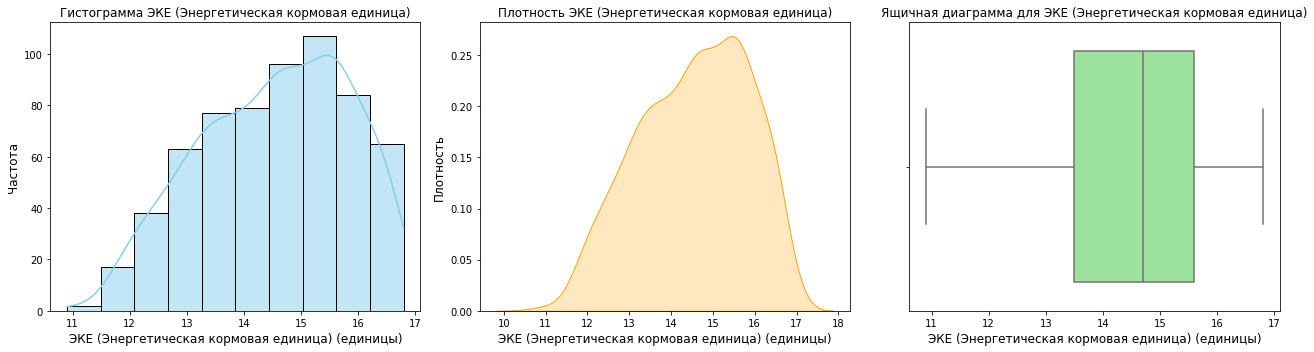

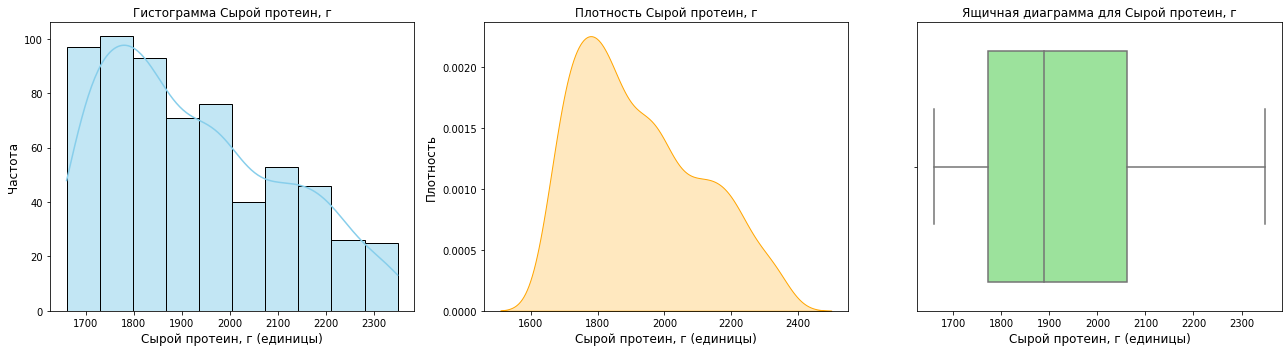

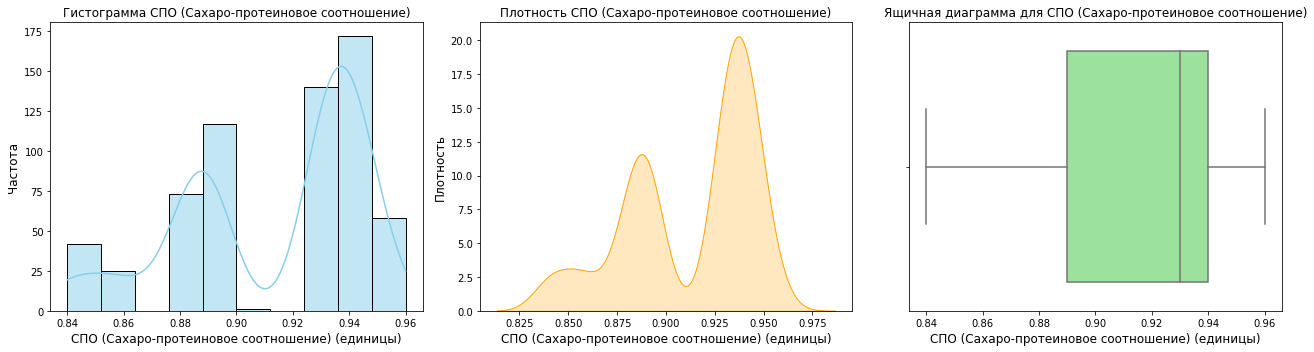

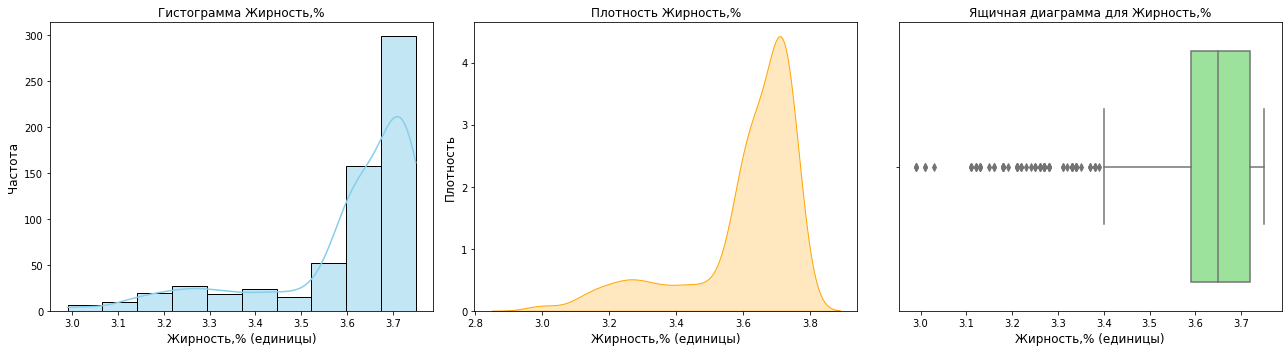

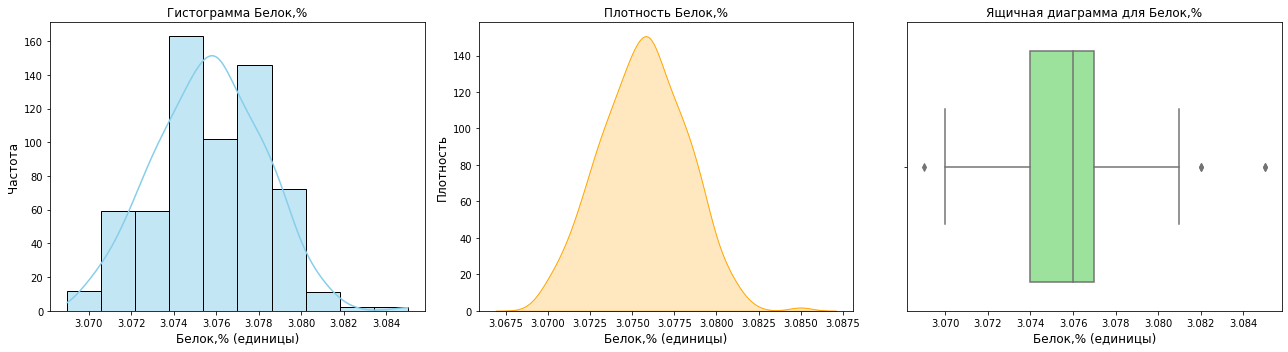

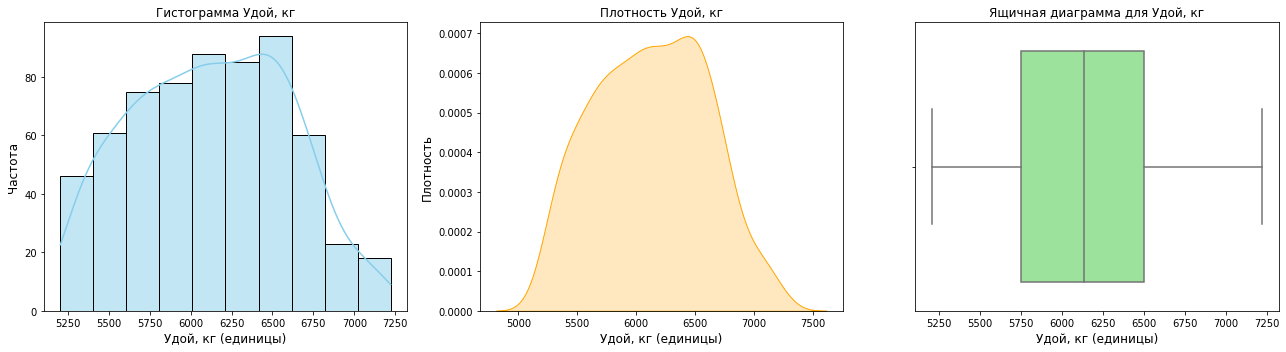

In [26]:

def plot_distribution_and_boxplot(dataframe, columns, labels):
    for column in columns:
        if column in dataframe.columns:  # Проверяем, существует ли признак в датафрейме
            # Создаем фигуру с тремя подграфиками
            fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # 1 строка, 3 колонки
            
            # Гистограмма для визуализации распределения признака
            sns.histplot(dataframe[column], bins=10, kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title(f'Гистограмма {labels.get(column, column)}')  # Используем пользовательскую подпись
            axes[0].set_xlabel(f'{labels.get(column, column)} (единицы)', fontsize=12)  # Подпись с единицами измерения
            axes[0].set_ylabel('Частота', fontsize=12)

            # Плотность распределения
            sns.kdeplot(dataframe[column], ax=axes[1], color='orange', fill=True)
            axes[1].set_title(f'Плотность {labels.get(column, column)}')  # Используем пользовательскую подпись
            axes[1].set_xlabel(f'{labels.get(column, column)} (единицы)', fontsize=12)  # Подпись с единицами измерения
            axes[1].set_ylabel('Плотность', fontsize=12)
            
            # Ящичная диаграмма для распределения признака
            sns.boxplot(x=dataframe[column], ax=axes[2], color='lightgreen')
            axes[2].set_title(f'Ящичная диаграмма для {labels.get(column, column)}')  # Используем пользовательскую подпись
            axes[2].set_xlabel(f'{labels.get(column, column)} (единицы)', fontsize=12)  # Подпись с единицами измерения
            
            # Отображение графиков
            plt.tight_layout()  # Настройка отступов между графиками
            plt.show()

# Количественные признаки для анализа
features_to_plot = [
    'eke', 
    'raw_protein_g', 
    'sugar_protein_ratio', 
    'fat_percentage', 
    'protein_percentage', 
    'current_fat_percentage', 
    'current_protein_percentage',
    'milk_yield_kg'
]

# Словарь с подписями на русском языке
labels_dict = {
    'id': 'Уникальный идентификатор коровы',
    'milk_yield_kg': 'Удой, кг',
    'eke': 'ЭКЕ (Энергетическая кормовая единица)',
    'raw_protein_g': 'Сырой протеин, г',
    'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
    'breed': 'Порода',
    'pasture_type': 'Тип пастбища',
    'father_breed': 'Порода папы_быка',
    'fat_percentage': 'Жирность,%',
    'protein_percentage': 'Белок,%',
    'milk_taste': 'Вкус молока',
    'age': 'Возраст',
    'current_fat_percentage': 'Текущая жирность,%',
    'current_protein_percentage': 'Текущий уровень белка,%',
    'father_name': 'Имя папы'
}

# Вызов функции для построения графиков
plot_distribution_and_boxplot(ferma_main, features_to_plot, labels_dict)


1. Распределение на каждом графике (ferma_main):

   - Энергетическая коровья единица (ЭКЕ): 
     - Гистограмма: распределение имеет слегка правостороннюю асимметрию. 
     - Плотность: форма распределения колоколообразная, но слегка сдвинута вправо. 
     - Ящик с усами: нет явных выбросов, но небольшая асимметрия подтверждается позицией медианы.

   - Сырой протеин (г):
     - Гистограмма: распределение асимметрично и мультимодально, с несколькими пиками.
     - Плотность: заметны два основных пика, что указывает на сложное распределение.
     - Ящик с усами: выбросы отсутствуют, но данные имеют широкий диапазон значений.

   - Сахаро-протеиновое соотношение (СПО):
     - Гистограмма: распределение правосторонне асимметрично.
     - Плотность: несколько пиков, что указывает на мультимодальность и асимметрию.
     - Ящик с усами: выбросов нет, но медиана слегка смещена влево от центра.

   - Жирность (%):
     - Гистограмма: сильно правосторонне асимметрично, с явным пиком на правом краю.
     - Плотность: форма распределения также правосторонне асимметрична.
     - Ящик с усами: значительное количество выбросов влево, медиана расположена ближе к верхней границе ящика.

   - Белок (%):
     - Гистограмма: распределение симметрично, присутствуют пики слева и справа от среднего.
     - Плотность: колоколообразная кривая.
     - Ящик с усами: несколько выбросов, медиана близка к центру ящика, что указывает на симметрию.

2. Выводы о данных:

   - В данных наблюдаются разные типы распределений. Для некоторых переменных, таких как ЭКЕ и Белок, распределения с легкими отклонениями. Для других, таких как Сырой протеин и Жирность, наблюдается явная асимметрия и мультимодальность.
   - Выбросы присутствуют в данных по Жирности и Белку, что может указывать на необычные значения или ошибки при сборе данных.
   - Для улучшения данных можно:
     - Рассмотреть трансформации данных, чтобы устранить асимметрию (например, логарифмическое преобразование для правосторонних распределений).
     - Провести анализ выбросов и при необходимости удалить или скорректировать выбросы, особенно в признаке Жирность.
     - Проверить корректность данных для мультимодальных распределений, чтобы понять, вызвано ли это характеристиками данных или потенциальными аномалиями.
     
     
     Аналогично построим графики для cow_buy:


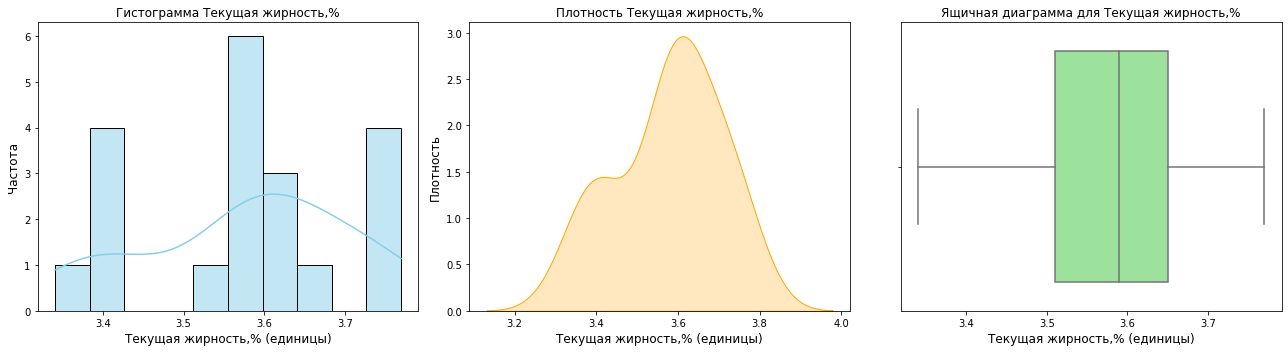

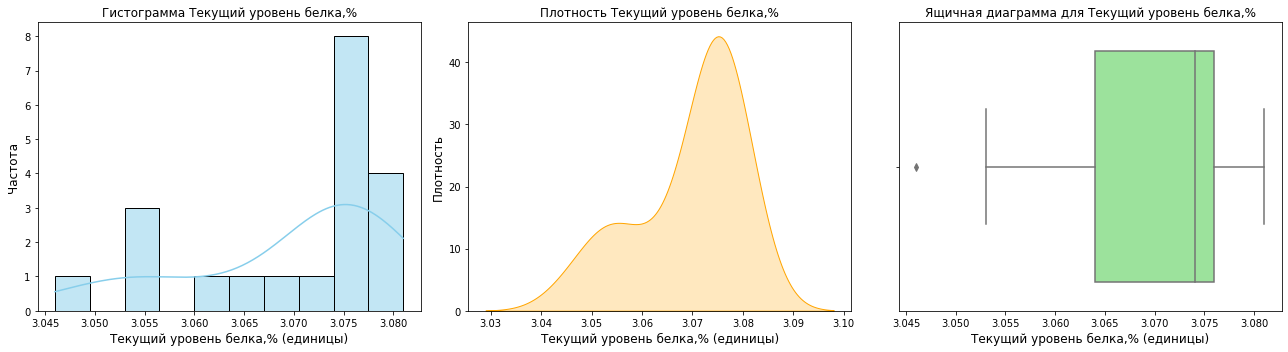

In [27]:
# Вызов функции для построения графиков
plot_distribution_and_boxplot(cow_buy, features_to_plot, labels_dict)

#### Выводы по графикам

- **Текущая жирность, %**: Распределение жирности близко к нормальному, с основной массой значений около 3.6%. Это указывает на стабильные показатели среди коров, с небольшими вариациями и отсутствием выбросов.

- **Текущий уровень белка, %**: Уровень белка также близок к нормальному распределению, сосредоточен около 3.07% и имеет еще меньшую вариативность, что свидетельствует о стабильности этого показателя.

**Общий вывод**: Жирность и уровень белка показывают устойчивые значения, что может указывать на высокие стандарты молока.

Теперь построим графики для категориальных переменных. Для этого создадим функцию и применим ее к ferma_main:

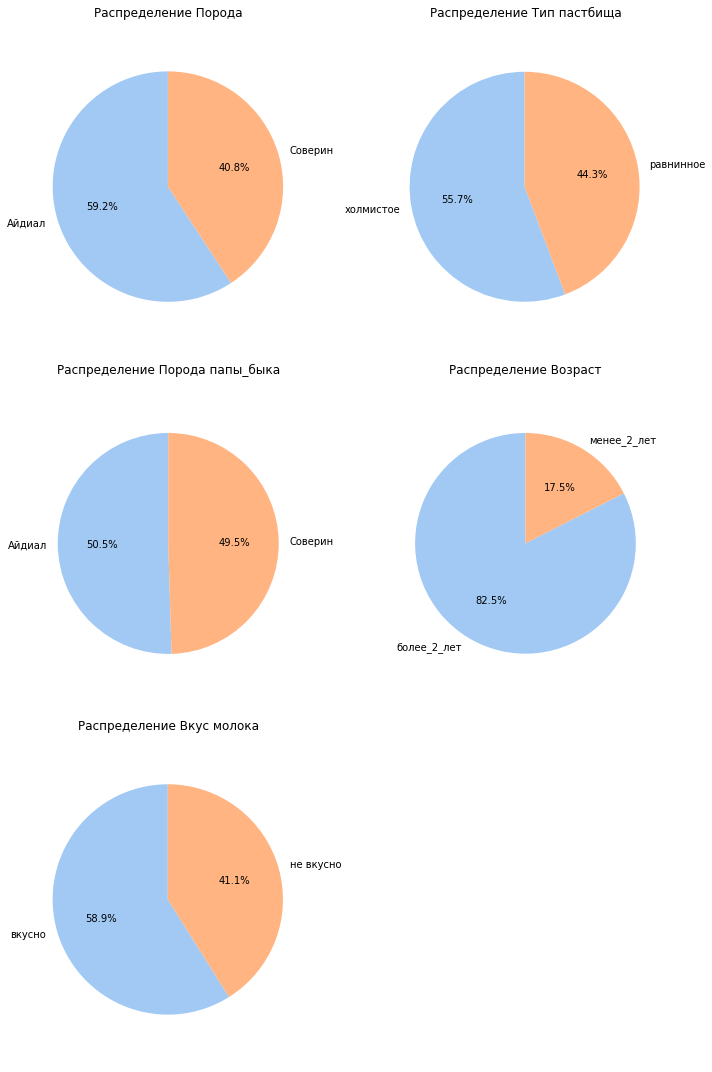

In [28]:

def plot_categorical_distribution(dataframe, columns, labels):
    # Создаем фигуру для подграфиков
    n_columns = 2  # Количество столбцов
    n_rows = (len(columns) + n_columns - 1) // n_columns  # Определяем количество строк
    plt.figure(figsize=(10, n_rows * 5))  # Размер графика

    for i, column in enumerate(columns):
        if column in dataframe.columns:  # Проверяем, существует ли признак в датафрейме
            plt.subplot(n_rows, n_columns, i + 1)  # Устанавливаем подграфики
            
            # Подсчет значений для круговой диаграммы
            counts = dataframe[column].value_counts()
            plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
            plt.axis('equal')  # Сохраняем соотношение сторон равным
            
            # Настройка заголовка
            plt.title(f'Распределение {labels.get(column, column)}')  # Используем пользовательскую подпись

    plt.tight_layout()  # Настройка отступов
    plt.show()

# Признаки для анализа
categorical_features_to_plot = [
    'breed', 
    'pasture_type', 
    'father_breed', 
    'age',
    'milk_taste',
    'father_name'
    
]

# Вызов функции для построения круговых диаграмм
plot_categorical_distribution(ferma_main, categorical_features_to_plot, labels_dict)


Выводы: 

Распределение пород коров относительно равномерное, с небольшим перевесом в сторону породы "Айдиалл". Типы пастбищ также распределены равномерно, при этом несколько чаще встречаются холмистые пастбища. Породы отцов быков разделены поровну между "Айдиалл" и "Соверин". В стаде на 65% больше взрослых коров старше двух лет по сравнению с молодыми. Вкус молока распределен примерно поровну, с небольшим преобладанием у категории "вкусного" молока.

Теперь применим эту же функцию к данным cow_buy:

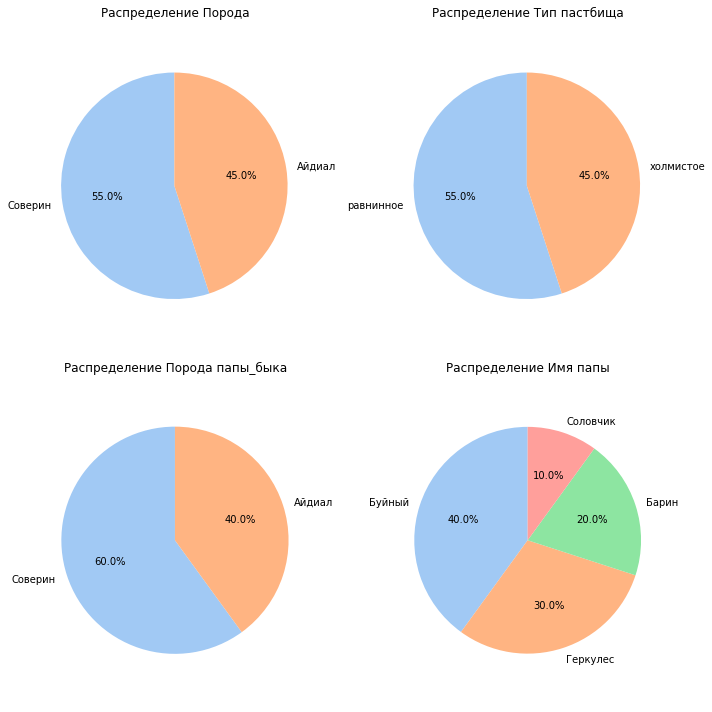

In [29]:
categorical_features_to_plot1 = [
    'breed', 
    'pasture_type', 
    'father_breed', 
    'father_name'
    
]
# Вызов функции для построения круговых диаграмм
plot_categorical_distribution(cow_buy, categorical_features_to_plot1, labels_dict)

В таблице `cow_buy` породы коров и типы пастбищ распределены абсолютно одинаково. Порода отца быка представлена "Соверин" в 62.5% случаев и "Айдиалл" — в 37.5%. В распределении имен отцов быков преобладает "Буйный" (43.8%), далее идет "Геркулес" с 31.2%, а имена "Соловчик" и "Барин" встречаются по 12.5% случаев каждое.

Построим круговую диаграмму для таблицы ferma_dad:

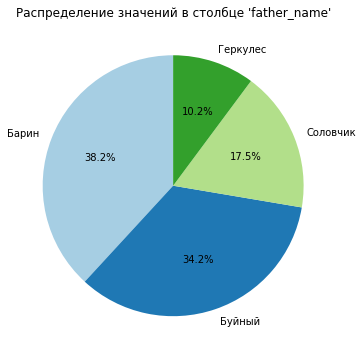

In [30]:
# Построение круговой диаграммы для распределения значений в столбце 'father_name'
ferma_dad['father_name'].value_counts().plot.pie(
    # Отображение процентов с одним десятичным знаком
    autopct='%1.1f%%',
    # Размер графика
    figsize=(8, 6), 
    # Угол начала отсчета
    startangle=90,
    # Цветовая схема диаграммы
    colors=plt.cm.Paired.colors, 
    title="Распределение значений в столбце 'father_name'" # Заголовок
)
# Убираем метку оси Y для улучшения внешнего вида
plt.ylabel('') 
 # Отображаем график
plt.show()                    


In [31]:
# Выведем количество записей каждого имени
ferma_dad['father_name'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: father_name, dtype: int64

Распределение значений в столбце `father_name` показывает, что самым распространённым быком является "Барин" (240), за ним следуют "Буйный" (215), "Соловчик" (110) и "Геркулес" (64). Таким образом, "Барин" и "Буйный" составляют основную часть записей, заметно превышая "Соловчика" и "Геркулеса".

In [32]:
ferma_main.describe().T

,count,mean,std,min,25%,50%,75%,max
id,628.0,315.474522,181.475367,1.000,158.750,315.500,472.250,629.000
milk_yield_kg,628.0,6125.968153,475.857053,5204.000,5749.750,6132.500,6501.000,7222.000
eke,628.0,14.548726,1.301777,10.900,13.500,14.700,15.600,16.800
raw_protein_g,628.0,1923.759554,182.832816,1660.000,1771.750,1888.000,2062.250,2349.000
sugar_protein_ratio,628.0,0.913089,0.032221,0.840,0.890,0.930,0.940,0.960
fat_percentage,628.0,3.604268,0.168093,2.990,3.590,3.650,3.720,3.750
protein_percentage,628.0,3.075670,0.002551,3.069,3.074,3.076,3.077,3.085


In [33]:
cow_buy.describe().T

,count,mean,std,min,25%,50%,75%,max
current_fat_percentage,20.0,3.5775,0.126818,3.340,3.510,3.590,3.650,3.770
current_protein_percentage,20.0,3.0695,0.010339,3.046,3.064,3.074,3.076,3.081


### Промежуточные выводы по исследовательскому анализу данных:

1. **Выбросы и необычное распределение**:
   - В данных была замечена аномалия: строка с аномальным значением **milk_yield_kg** (45616 кг) была удалена. Это значение явно выбивалось за пределы нормальных показателей и могло искажать результаты анализа.
   - Остальные количественные признаки, такие как **жирность**, **протеин**, и **удой**, демонстрируют нормальное распределение с отсутствием значительных выбросов. Средние значения этих признаков находятся в пределах стандартных норм, что указывает на стабильное качество молока.
   
2. **Основные характеристики:**

   - Средний удой составляет 6126 кг, сырой протеин — 1924 г, а энергетическая кормовая единица (ЭКЕ) колеблется от 10.9 до 16.8. Эти показатели свидетельствуют о стабильном качестве и разнообразии кормов.
   - Жирность молока в среднем составляет 3.6%, белок — 3.08%, что соответствует стандартам качества.

2. **План по улучшению данных**:
   - **Проверка на выбросы**: В дальнейшем рекомендуется регулярно проводить анализ на наличие выбросов и аномальных значений для всех количественных признаков. Использование статистических методов, таких как IQR (межквартильный размах) или Z-оценка, поможет выявить такие значения.
   - **Анализ данных**: Для более глубокого понимания распределения данных можно использовать визуализацию, например, гистограммы или коробчатые диаграммы. Это позволит выявить потенциальные проблемы с распределением данных.
   - **Дополнительные исследования**: Если возможны значительные изменения в данных, как в случае с **Энергетической кормовой единицей (eke)**, следует провести дополнительные исследования или опросы, чтобы понять причины этих изменений и их влияние на качество молока.
   - **Стандартизация и нормализация данных**: Для сопоставления с международными стандартами может быть полезно рассмотреть стандартизацию или нормализацию данных, чтобы минимизировать влияние индивидуальных различий.

 Заключение
Данные в целом выглядят стабильными и адекватными, за исключением одного выброса. Регулярный мониторинг и улучшение методов анализа данных помогут поддерживать высокое качество анализа и принятия решений на основе данных.

## Корреляционный анализ

Проведем корреляционный анализ признаков в датасете ferma_main.csv.
Для расчёта корреляции и построения корреляционной матрицы воспользуемся библиотекой `phik` и её методом `phik_matrix`.

In [34]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   milk_yield_kg        628 non-null    int64  
 2   eke                  628 non-null    float64
 3   raw_protein_g        628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   father_breed         628 non-null    object 
 8   fat_percentage       628 non-null    float64
 9   protein_percentage   628 non-null    float64
 10  milk_taste           628 non-null    object 
 11  age                  628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


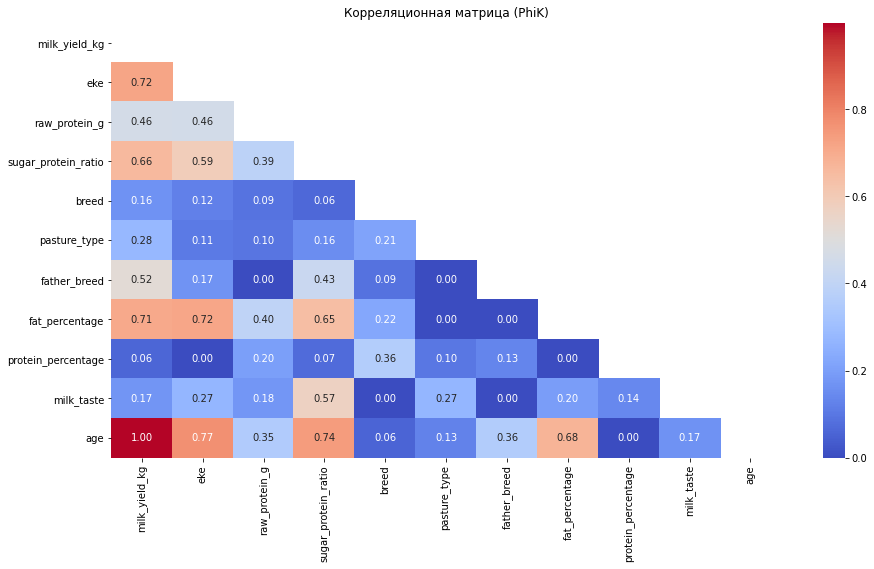

In [35]:
# Указываем список непрерывных признаков
interval_cols = ['milk_yield_kg', 'eke', 'raw_protein_g', 'sugar_protein_ratio',
                 'fat_percentage', 'protein_percentage']

# 1. Расчет корреляционной матрицы, исключая столбец 'id' и добавляя параметр interval_cols
phik_matrix = ferma_main.drop(columns=['id']) \
    .phik_matrix(interval_cols=interval_cols)

# 2. Создание маски для верхней треугольной части матрицы
mask = np.triu(np.ones_like(phik_matrix, dtype=bool))

# 3. Настройка графика
plt.figure(figsize=(15, 8))

# 4. Визуализация корреляционной матрицы с помощью тепловой карты
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)

# 5. Добавление заголовка
plt.title("Корреляционная матрица (PhiK)")

# 6. Отображение графика
plt.show()


1. **Корреляция между признаками** 
   - Корреляционная матрица показывает, что возраст коровы (age) имеет очень сильную положительную корреляцию с удоем (milk_yield_kg), с коэффициентом 1.00. Это означает, что коровы старше двух лет производят больше молока, что указывает на значительное влияние возраста на удой.
   - Целевой признак, удой, положительно коррелирует с энергетической кормовой единицей (ЭКЕ, eke) и жирностью (fat_percentage), с коэффициентами 0.72 и 0.71 соответственно. Эти показатели указывают, что более калорийный рацион и более высокий процент жира в рационе способствуют увеличению удоя.
   - Также наблюдается умеренная положительная корреляция между удоем и соотношением сахара к протеину (сахаро-протеиновое соотношение, sugar_protein_ratio) с коэффициентом 0.66. Это может означать, что оптимальное соотношение сахара и белка в рационе связано с повышенной молочной продуктивностью.
   - Кроме того, возраст (age) коррелирует с ЭКЕ (0.77), жирностью (0.68) и сахаро-протеиновым соотношением (0.74), что указывает на более высокие значения этих показателей у старших коров.

**Анализ целевого признака — удоя:**  
Удой определён как целевой признак, так как это основной показатель для фермера, который необходимо улучшать. Чтобы оценить взаимосвязи в подгруппах, построим диаграммы рассеяния для удоя с другими количественными признаками, разделяя данные по породам, типам пастбищ и возрасту. Например, в диаграмме для удоя и сырого протеина цвет точек будет обозначать породу. Такой подход позволит нам учесть, что взаимосвязи между признаками могут различаться в зависимости от подгруппы, например, по породам.


**Анализ корреляции признаков в зависимости типа породы:**  

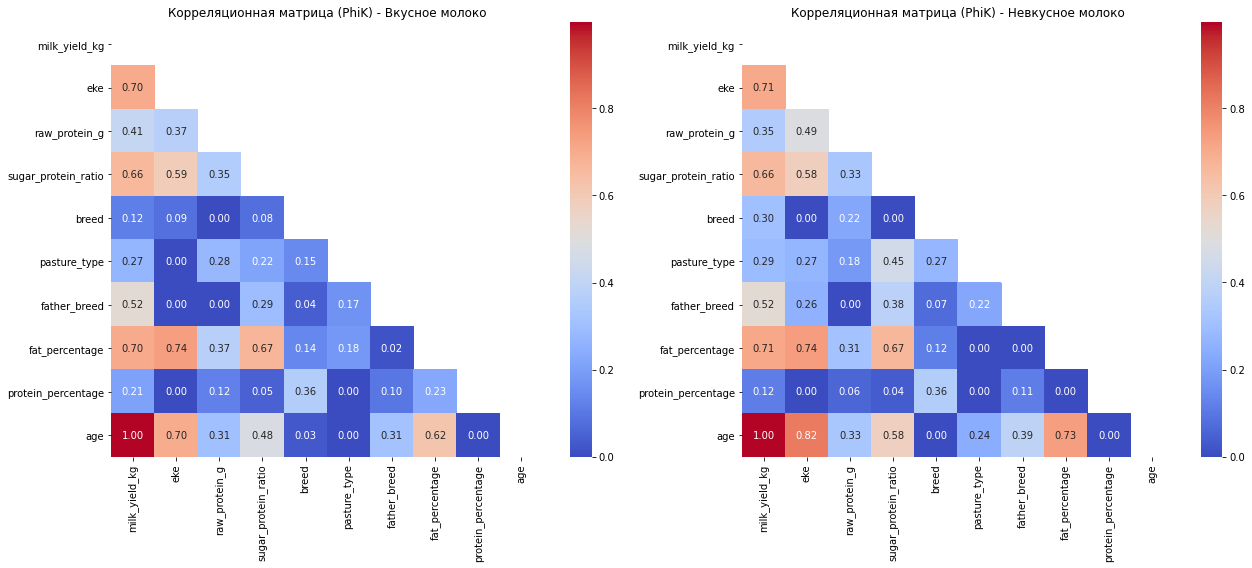

In [36]:
# Фильтрация данных по классам
df_tasty = ferma_main[ferma_main['milk_taste'] == 'вкусно']
df_not_tasty = ferma_main[ferma_main['milk_taste'] == 'не вкусно']


# Указываем список непрерывных признаков
interval_cols = ['milk_yield_kg', 'eke', 'raw_protein_g', 'sugar_protein_ratio',
                 'fat_percentage', 'protein_percentage']

# 1. Расчет корреляционной матрицы для "вкусного молока", 
#исключая столбец 'id' и добавляя параметр interval_cols
phik_matrix_tasty = df_tasty.drop(columns=['id']).phik_matrix(interval_cols=interval_cols)

# 2. Создание маски для верхней треугольной части матрицы для "вкусного молока"
mask_tasty = np.triu(np.ones_like(phik_matrix_tasty, dtype=bool))

# 3. Расчет корреляционной матрицы для "невкусного молока", 
#исключая столбец 'id' и добавляя параметр interval_cols
phik_matrix_not_tasty = df_not_tasty.drop(columns=['id']).phik_matrix(interval_cols=interval_cols)

# 4. Создание маски для верхней треугольной части матрицы для "невкусного молока"
mask_not_tasty = np.triu(np.ones_like(phik_matrix_not_tasty, dtype=bool))

# Настройка фигуры для отображения двух графиков рядом
plt.figure(figsize=(18, 8))

# 1-й график: Тепловая карта для "вкусного молока"
plt.subplot(1, 2, 1) 
sns.heatmap(phik_matrix_tasty, annot=True, fmt=".2f", cmap="coolwarm", mask=mask_tasty)
plt.title("Корреляционная матрица (PhiK) - Вкусное молоко")

# 2-й график: Тепловая карта для "невкусного молока"
plt.subplot(1, 2, 2)
sns.heatmap(phik_matrix_not_tasty, annot=True, fmt=".2f", cmap="coolwarm", mask=mask_not_tasty)
plt.title("Корреляционная матрица (PhiK) - Невкусное молоко")

# Отображение графиков
plt.tight_layout()  # Обеспечивает правильное расположение графиков
plt.show()


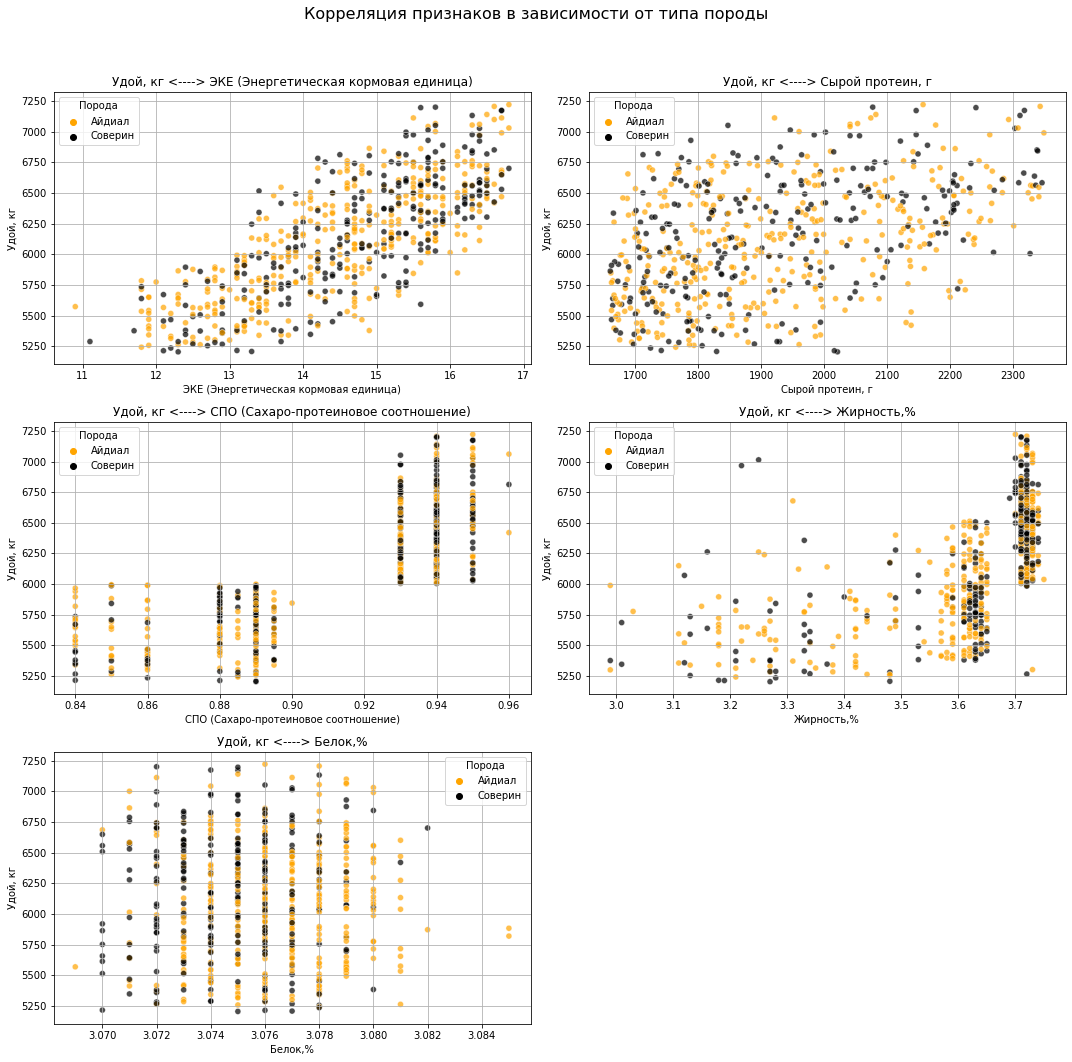

In [37]:
# Список количественных признаков в ferma_main
quantitative_features = [
    'milk_yield_kg', 
    'eke', 
    'raw_protein_g', 
    'sugar_protein_ratio', 
    'fat_percentage', 
    'protein_percentage'
]

# Определяем размер фигуры и заголовок
plt.figure(figsize=(15, 15))
plt.suptitle("Корреляция признаков в зависимости от типа породы", fontsize=16)  # Общая подпись перед графиками

# Параметры для сетки (2 строки и 3 столбца)
rows = 3
cols = 2

for i, feature in enumerate(quantitative_features[1:]):  # Пропускаем 'milk_yield_kg'
    plt.subplot(rows, cols, i + 1)  # Устанавливаем подграфик
    sns.scatterplot(data=ferma_main, x=feature, y='milk_yield_kg', hue='breed', alpha=0.7, palette=['orange', 'black'])
    plt.title(f'{labels_dict["milk_yield_kg"]} <----> {labels_dict[feature]}')  # Используем словарь для заголовка
    plt.xlabel(labels_dict[feature])  # Подпись оси x из словаря
    plt.ylabel(labels_dict['milk_yield_kg'])  # Подпись оси y из словаря
    plt.legend(title=labels_dict['breed'])  # Подпись легенды
    plt.grid()

# Настройка отступов
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect позволяет оставить место для общего заголовка
plt.show()


Выводы о корреляции признаков в зависимости типа породы:

1. **Удой, кг <—> ЭКЕ (Энергетическая кормовая единица)**: Наблюдается умеренная положительная корреляция — с ростом ЭКЕ удой увеличивается. Оба типа пастбищ показывают одинаковую зависимость, и точки для равнинных и холмистых пастбищ почти не отличаются.

2. **Удой, кг <—> Сырой протеин, г**: Корреляция между удоем и сырым протеином практически отсутствует, точки распределены хаотично. Тип пастбища не влияет на эту зависимость, и различий между равнинными и холмистыми участками нет.

3. **Удой, кг <—> СПО (Сахаро-протеиновое соотношение)**: Слабая отрицательная корреляция — на более высоких уровнях СПО удой немного ниже. Оба типа пастбищ демонстрируют схожую тенденцию, без явного разделения по типу.

4. **Удой, кг <—> Жирность, %**: Незначительная отрицательная корреляция, удой слегка снижается при высоких уровнях жирности. Тип пастбища практически не влияет на эту зависимость, хотя при высоких значениях жирности чуть больше точек наблюдается для холмистых пастбищ.

5. **Удой, кг <—> Белок, %**: Отсутствие значимой корреляции, точки равномерно распределены вдоль значений белка. Равнинные и холмистые пастбища не демонстрируют различий, влияние типа пастбища на эту зависимость минимально.

В целом, тип пастбища не оказывает значительного влияния на корреляцию между удоем и исследуемыми показателями (ЭКЕ, сырой протеин, СПО, жирность и белок). На всех графиках равнинные и холмистые пастбища демонстрируют схожие зависимости или их отсутствие.

**Анализ корреляции признаков в зависимости типа пастбищ:**  

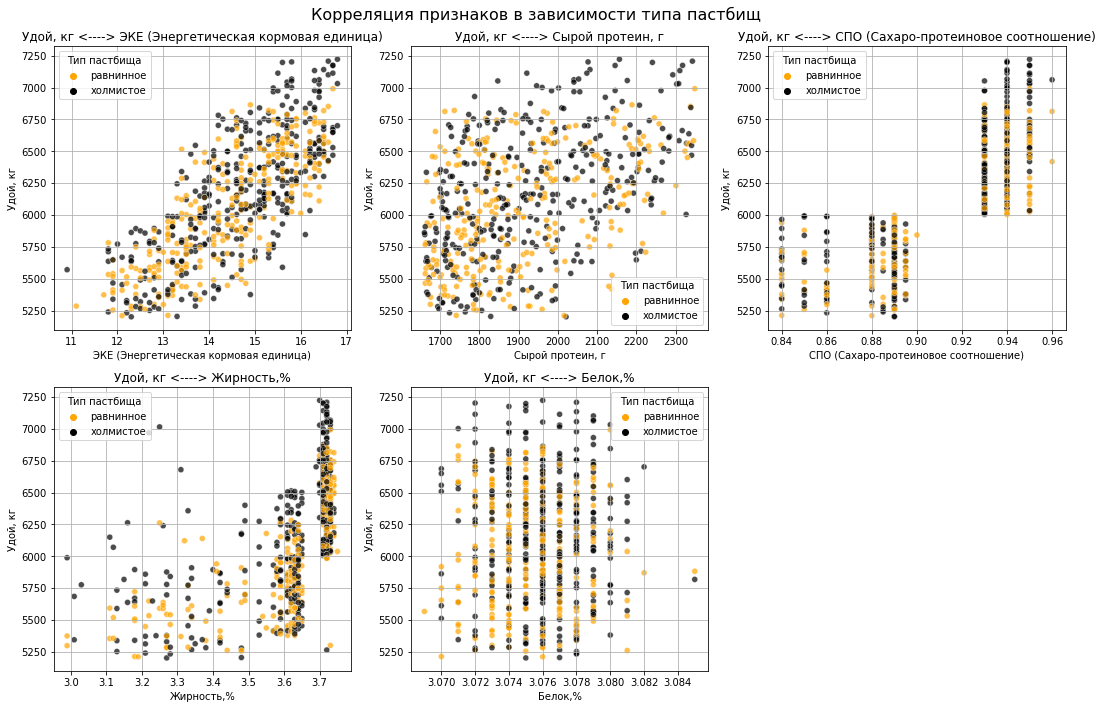

In [38]:
plt.figure(figsize=(15, 10))
plt.suptitle("Корреляция признаков в зависимости типа пастбищ", fontsize=16)  # Общая подпись перед графиками
for i, feature in enumerate(quantitative_features[1:]):  # Пропускаем 'milk_yield_kg'
    plt.subplot(2, 3, i + 1)  # Индексируем подграфики
    sns.scatterplot(data=ferma_main, x=feature, y='milk_yield_kg', hue='pasture_type', alpha=0.7, palette=['orange', 'black'])
    plt.title(f'{labels_dict["milk_yield_kg"]} <----> {labels_dict[feature]}')  # Используем словарь для заголовка
    plt.xlabel(labels_dict[feature])  # Подпись оси x из словаря
    plt.ylabel(labels_dict['milk_yield_kg'])  # Подпись оси y из словаря
    plt.legend(title=labels_dict['pasture_type'])  # Подпись легенды
    plt.grid()

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Выводы о корреляции признаков в зависимости типа пастбищ:

1. Удой, кг ↔ ЭКЕ (Энергетическая кормовая единица): Сильная положительная корреляция, удой растет с увеличением ЭКЕ; на холмистых пастбищах удой немного выше при аналогичных значениях ЭКЕ.

2. Удой, кг ↔ Сырой протеин, г: Корреляции нет, удой распределен хаотично относительно содержания сырого протеина; тип пастбища не влияет на связь.

3. Удой, кг ↔ СПО (Сахаро-протеиновое соотношение): Корреляция отсутствует, и влияние типа пастбища на эту связь не проявляется.

4. Удой, кг ↔ Жирность, %: Слабая отрицательная корреляция, удой немного снижается с увеличением жирности, особенно на холмистых пастбищах.

5. Удой, кг ↔ Белок, %: Корреляции нет, удой равномерно распределен по диапазону содержания белка; тип пастбища также не оказывает влияния.

Эти выводы показывают, что удой сильнее всего зависит от ЭКЕ, а остальные параметры не оказывают значимого влияния.

**Анализ корреляции признаков в разрезе возраста коров:** 

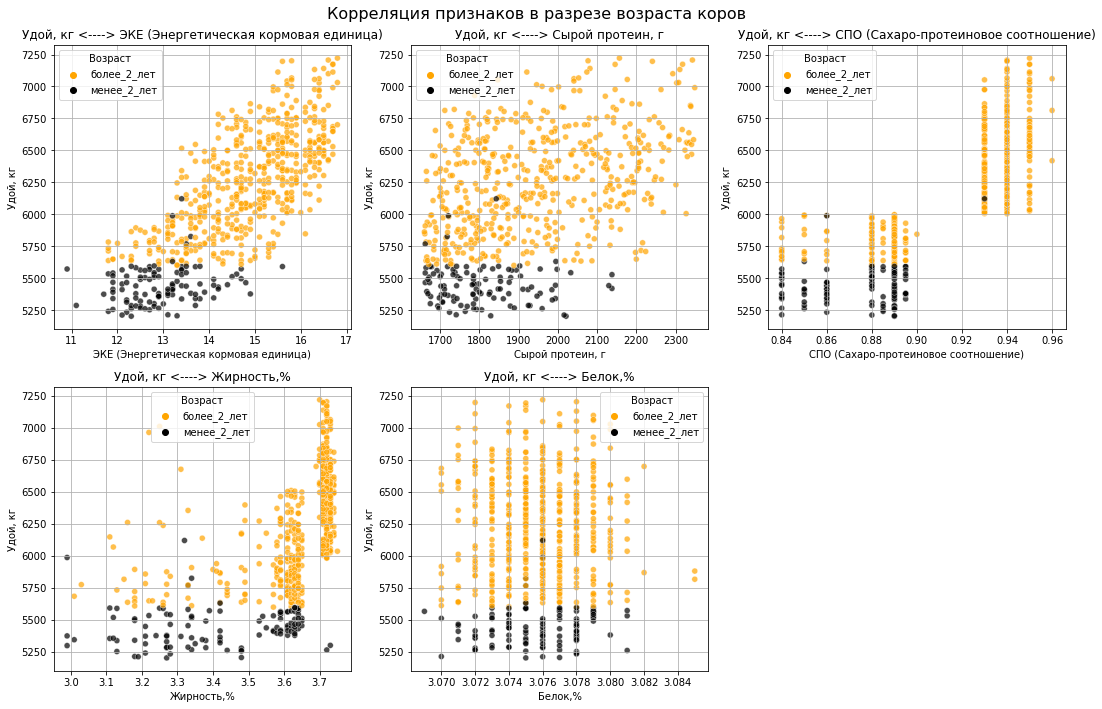

In [39]:
plt.figure(figsize=(15, 10))
plt.suptitle("Корреляция признаков в разрезе возраста коров", fontsize=16)  # Общая подпись перед графиками
for i, feature in enumerate(quantitative_features[1:]):  # Пропускаем 'milk_yield_kg'
    plt.subplot(2, 3, i + 1)  # Индексируем подграфики
    sns.scatterplot(data=ferma_main, x=feature, y='milk_yield_kg', hue='age', alpha=0.7, palette=['orange', 'black'])
    plt.title(f'{labels_dict["milk_yield_kg"]} <----> {labels_dict[feature]}')  # Используем словарь для заголовка
    plt.xlabel(labels_dict[feature])  # Подпись оси x из словаря
    plt.ylabel(labels_dict['milk_yield_kg'])  # Подпись оси y из словаря
    plt.legend(title=labels_dict['age'])  # Подпись легенды
    plt.grid()

plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

Выводы о корреляции признаков в разрезе возраста коров:

1. Удой, кг <—> ЭКЕ (Энергетическая кормовая единица): Удой положительно коррелирует с ЭКЕ у коров обоих возрастов. Однако у молодых коров (оранжевые точки) наблюдается меньший диапазон как по удою, так и по ЭКЕ по сравнению с взрослыми коровами (черные точки), у которых эта корреляция более выражена и охватывает более высокие значения.

2. Удой, кг <—> Сырой протеин, г: Корреляция между удоем и сырым протеином слабая, с обеими возрастными группами, показывающими схожее распределение. Хотя более молодые коровы (оранжевые точки) имеют меньший разброс значений, их распределение в целом похоже на распределение для взрослых коров (черные точки).

3. Удой, кг <—> СПО (Сахаро-протеиновое соотношение): В целом корреляция с СПО слабая и отрицательная для обеих возрастных групп. Взрослые коровы (черные точки) охватывают больший диапазон значений СПО и удоя, в то время как у молодых коров (оранжевые точки) более узкий диапазон, но тенденция слабой отрицательной зависимости остается.

4. Удой, кг <—> Жирность, %: Видна слабая отрицательная корреляция, но она различается в зависимости от возраста. У взрослых коров (черные точки) более широкий диапазон значений жирности, особенно на более высоких уровнях жирности, чем у молодых коров. У молодых коров (оранжевые точки) разброс меньше, и они демонстрируют небольшую тенденцию к снижению удоя при увеличении жирности.

5. Удой, кг <—> Белок, %: Корреляция между удоем и процентом белка незначительна и распределение хаотично для обоих возрастных групп. Оба возраста показывают схожее распределение без сильных различий, что указывает на минимальное влияние возраста на зависимость между белком и удоем.


**Анализ взаимосвязей и выводы**

1. **Взаимосвязь между возрастом и удоем**:
   - Возраст коров оказывает значительное влияние на удой: коэффициент корреляции между возрастом и удоем составляет 1.00, что подтверждает более высокий удой у коров старше 2 лет. Это указывает на сильную положительную взаимосвязь, где старшие коровы дают больше молока.

2. **Анализ корреляций между признаками**:
   - **Целевой признак (удой)** имеет сильную положительную корреляцию с энергетической кормовой единицей (ЭКЕ) и процентом жирности, с коэффициентами 0.72 и 0.71 соответственно. Это свидетельствует о том, что увеличение энергетической ценности корма и процентного содержания жира способствует повышению удоя.
   - Также удой умеренно положительно коррелирует с сахаро-протеиновым соотношением (СПО), с коэффициентом 0.66. Это может говорить о том, что оптимальное соотношение сахара и протеина в рационе положительно сказывается на молочной продуктивности.
   - Возраст дополнительно сильно коррелирует с такими признаками, как ЭКЕ (0.77), жирность (0.68) и СПО (0.74), что указывает на тенденцию увеличения этих показателей у старших коров.

3. **Тип взаимосвязи между целевым признаком и входными признаками**:
   - Взаимосвязи между целевым признаком (удоем) и основными входными признаками (ЭКЕ, жирность, СПО) являются положительными и линейными. На графиках плотности наблюдаются линейные положительные тренды для удоя с ЭКЕ и процентом жирности, что подтверждает линейный характер этих взаимосвязей.
   - Признаки, такие как процент белка и тип пастбища, имеют более слабую корреляцию с удоем, что может указывать на их меньшую значимость или более сложные (возможно, нелинейные) зависимости.

4. **Линейность и нелинейность взаимосвязей**:
   - Основные признаки (ЭКЕ и жирность) показывают линейную связь с удоем, что видно на графиках плотности. Нелинейных зависимостей, требующих введения дополнительных признаков или функций для учета нелинейных эффектов, не обнаружено. Таким образом, текущие признаки адекватны для линейного моделирования удоя.

5. **Мультиколлинеарность**:
   - Мультиколлинеарность между входными признаками не наблюдается, так как коэффициенты корреляции между ними не превышают 0.9 по модулю. Это означает, что признаки не дублируют друг друга в значительной степени, и использование дополнительных методов для устранения мультиколлинеарности не требуется.

### Промежуточный вывод по корреляционному анализу

Корреляция между возрастом и удоем составляет 1.00, что указывает на то, что старшие коровы дают больше молока. Удой имеет сильную положительную корреляцию с ЭКЕ (0.72) и жирностью (0.71), а также умеренную корреляцию с СПО (0.66). Это свидетельствует о том, что повышение энергетической ценности корма и содержания жира способствует увеличению удоя. Возраст коров также сильно коррелирует с ЭКЕ (0.77), жирностью (0.68) и СПО (0.74), что говорит о росте этих показателей у старших коров. Взаимосвязи между удоем и основными признаками (ЭКЕ, жирность, СПО) являются положительными и линейными, в то время как корреляции с процентом белка и типом пастбища более слабы. Признаки ЭКЕ и жирность демонстрируют линейные зависимости с удоем, что исключает необходимость введения дополнительных признаков для учета нелинейных эффектов. Мультиколлинеарность между входными признаками не наблюдается, так как коэффициенты корреляции не превышают 0.9. Тип пастбища не оказывает значительного влияния на корреляцию между удоем и другими показателями. Удой в основном зависит от ЭКЕ, в то время как влияние сырого протеина и белка остается незначительным. Для оптимизации удоя следует сосредоточиться на повышении энергетической ценности рациона.

## Обучение модели линейной регрессии

Нам предстоит обучить три модели простой линейной регрессии.


Подготовим данные датасета ferma_main.csv и обучим на них первую модель LinearRegression.


В качестве целевого признака будем использовать Удой, кг.

In [40]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   628 non-null    int64  
 1   milk_yield_kg        628 non-null    int64  
 2   eke                  628 non-null    float64
 3   raw_protein_g        628 non-null    int64  
 4   sugar_protein_ratio  628 non-null    float64
 5   breed                628 non-null    object 
 6   pasture_type         628 non-null    object 
 7   father_breed         628 non-null    object 
 8   fat_percentage       628 non-null    float64
 9   protein_percentage   628 non-null    float64
 10  milk_taste           628 non-null    object 
 11  age                  628 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.8+ KB


### 1. Обучение 1-ой модели

### Анализ признаков

1. **id**: Уникальный идентификатор коровы. 
   - Этот признак не содержит полезной информации о продуктивности и не подходит для модели.

2. **eke (Энергетическая кормовая единица)**: 
   - Показатель, характеризующий энергетическую ценность корма. 
   - Имеет логическую причинно-следственную связь с удоем, так как корм с высокой энергетической ценностью может улучшить молочную продуктивность. Этот признак будет включен в модель.

3. **raw_protein_g (Сырой протеин, г)**: 
   - Протеин в рационе может оказывать влияние на молочную продуктивность. 
   - Хотя связь может быть слабее по сравнению с энергией корма, raw_protein_g также будет включен для изучения его вклада в модель.

4. **sugar_protein_ratio (Сахаро-протеиновое соотношение)**: 
   - Этот показатель характеризует баланс сахара и протеина в корме, что может влиять на усвоение корма и, косвенно, на удой. 
   - Признак также будет включен в модель.

5. **breed (Порода)**: 
   - Определяет наследственные особенности коров, такие как скорость роста и продуктивность. 
   - Этот категориальный признак имеет значимую причинно-следственную связь с удоем и будет закодирован в числовом формате для использования в линейной модели.

6. **pasture_type (Тип пастбища)**: 
   - Условия выпаса могут косвенно влиять на удой, так как разные пастбища предоставляют различные виды кормов и условий для коров. 
   - Включим этот категориальный признак, закодировав его числовыми значениями.

7. **father_breed (Порода отца)**: 
   - Хотя порода отца может влиять на наследственные качества, прямая зависимость с удоем для модели линейной регрессии здесь менее очевидна, так как эта связь слабее по сравнению с другими факторами.

8. **fat_percentage (Жирность, %)** и **protein_percentage (Белок, %)**: 
   - Эти характеристики уже зависят от фактического удоя. 
   - Включение этих признаков может ввести мультиколлинеарность и не будет логичным с точки зрения причинно-следственной связи.

9. **milk_taste (Вкус молока)**: 
   - Субъективный параметр, не имеющий логической причинной связи с удоем. 
   - Исключим этот признак из модели.

10. **age (Возраст)**: 
    - Возраст коровы напрямую влияет на продуктивность: молодые и зрелые коровы дают больше молока, чем совсем молодые или старые. 
    - Признак age имеет логическую связь с удоем и будет включен в модель.

### Подготовка данных

**Список отобранных признаков:**
- eke
- raw_protein_g
- sugar_protein_ratio
- breed (закодировать числовыми значениями)
- pasture_type (закодировать числовыми значениями)
- age (закодировать числовыми значениями)
- father_breed

**Целевой признак:**
- milk_yield_kg

#### Установим рандомное число и определим признаки и целевую переменную для модели:

In [41]:
# Определение признаков и целевой переменной
X = ferma_main[['eke', 'raw_protein_g', 'sugar_protein_ratio', 'breed', 'pasture_type', 
                 'age', 'father_breed']]
y = ferma_main['milk_yield_kg']

#### Разделим выборку на обучающую и тестовую:

In [42]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 7)
(157, 7)
(471,)
(157,)


#### Выделим категориальные и числовые признаки:

In [43]:
# Определение категориальных и числовых признаков
cat_col_names = ['breed', 'father_breed', 'pasture_type','age']
num_col_names = ['eke', 'raw_protein_g', 'sugar_protein_ratio']

#### Используем метод OneHotEncoder для кодирования категориальных признаков:

In [44]:
# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# Получение имен колонок после кодирования
encoder_col_names = encoder.get_feature_names_out(cat_col_names)
encoder_col_names

array(['breed_Соверин', 'father_breed_Соверин', 'pasture_type_холмистое',
       'age_менее_2_лет'], dtype=object)

#### Используем метод StandardScaler для масштабирования числовых признаков:

In [45]:
# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

#### Создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных:

In [46]:
# Проверка размеров для кодированных данных
print("Размеры X_train_ohe:", X_train_ohe.shape)
print("Размеры encoder_col_names:", len(encoder_col_names))

# Проверка размеров для стандартизированных данных
print("Размеры X_train_scaled:", X_train_scaled.shape)
print("Размеры num_col_names:", len(num_col_names))

Размеры X_train_ohe: (471, 4)
Размеры encoder_col_names: 4
Размеры X_train_scaled: (471, 3)
Размеры num_col_names: 3


In [47]:
# Объединение закодированных и стандартизированных признаков в один DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


#### Обучение модели и получение предсказаний

In [48]:
# Обучение модели линейной регрессии
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Предсказания на тестовых данных
predictions = model_lr.predict(X_test)

In [49]:
residuals_1 = y_test - predictions
# Оценка модели
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R²: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


Mean Squared Error: 43887.02
R²: 0.7844
Mean Absolute Error: 164.24
Root Mean Squared Error: 209.49


#### Анализ остатков

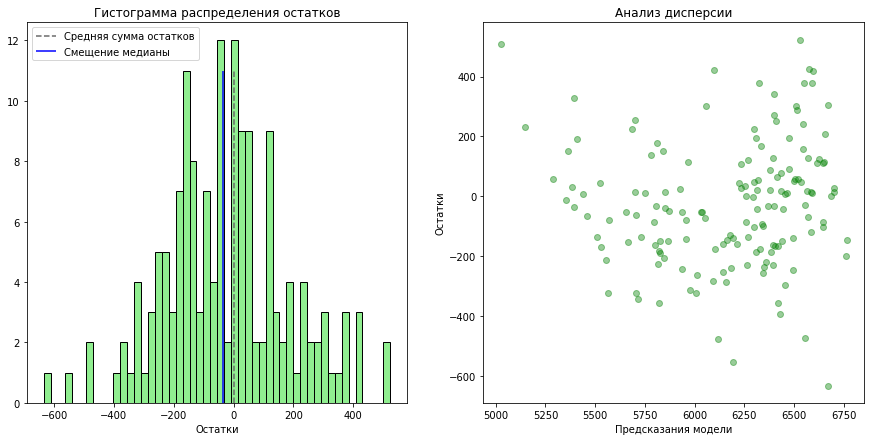

In [50]:
# Анализ остатков
residuals_1 = y_test - predictions
# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].hist(residuals_1, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_1, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Оценка качества модели

После обучения модели линейной регрессии на тестовой выборке получились следующие метрики:

- **Mean Squared Error (MSE)**: 43146.80
- **R²**: 0.79
- **Mean Absolute Error (MAE)**: 161.78
- **Root Mean Squared Error (RMSE)**: 207.72


Значение R² составляет 0.79, что означает, что модель объясняет 79% вариации удоя. Это неплохо, но 21% остаются необъясненными, возможно, из-за факторов, которые мы не учли.

#### Анализ остатков Модель 1
- **Гистограмма распределения остатков**: Гистограмма остатков показывает, что распределение несколько скошено вправо, с пиком около нуля, но с заметным числом значений в положительном диапазоне (до +400). Остатки варьируются от -600 до +400, что свидетельствует о наличии как недооценок, так и переоценок, причём количество больших положительных остатков больше, чем отрицательных.
- **Анализ дисперсии**: На графике "Остатки vs Предсказания" нет явных паттернов, остатки выглядят равномерно распределёнными вокруг нуля по всей шкале предсказаний. Однако присутствует несколько больших положительных остатков (выбросов), что может указывать на менее точные предсказания для части данных.

Остатки выглядят случайными по отношению к предсказаниям, что тоже хорошо, но из-за выбросов модель может испытывать трудности с прогнозированием для некоторых редких случаев.

#### Необходимость дополнительных исследований

Хотя модель показывает хорошие результаты, есть смысл попробовать улучшить её, добавив новые признаки или применив более сложные методы. Также стоит провести анализ выбросов и проверить, почему они появляются. 

### 2. Линейная модель 2

На основании анализа диаграмм рассеяния можно выделить следующие наблюдения о нелинейных зависимостях между признаками:

1. **Сахаро-протеиновое соотношение (СПО) и Удой**:
   - График "Удой, кг <--> СПО" показывает четкое разделение на два кластера по значениям СПО. Наблюдения сгруппированы в два основных диапазона: приблизительно до 0.90 и от 0.92. Таким образом, границу между кластерами можно провести около значения СПО = 0.91. Преобразовав признак СПО в категориальный бинарный признак с этой границей, можно исключить нелинейность.

2. **Энергетическая кормовая единица (ЭКЕ) и Удой**:
   - На графике "Удой, кг <--> ЭКЕ" видна некоторая нелинейная зависимость, при которой увеличение ЭКЕ не приводит к пропорциональному увеличению удоя. Для устранения этой нелинейности можно ввести новый признак "ЭКЕ в квадрате" (ЭКЕ²), чтобы лучше уловить эту зависимость.

Таким образом, для линейной регрессии сделаем следующие действия:
- Преобразуем признак СПО в бинарный категориальный признак с границей на уровне 0.91.
- Добавим новый признак ЭКЕ² для учета нелинейной зависимости между ЭКЕ и удоем. 

Эти изменения должны помочь улучшить качество линейной регрессии, сделав ее более подходящей для этих данных.

#### Подготовим данные:

In [51]:
# Преобразование СПО в бинарный признак

ferma_main['spo_binary'] = ferma_main['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)

# Создание нового признака: ЭКЕ в квадрате
ferma_main['eke_squared'] = ferma_main['eke'] ** 2

# Подбор признаков для модели
X = ferma_main[['eke_squared', 'raw_protein_g', 'spo_binary', 'breed', 
                 'pasture_type', 'age', 'father_breed']]
y = ferma_main['milk_yield_kg']


#### Разделим выборку на обучающую и тестовую:

In [52]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

#### Выделим категориальные и числовые признаки:

In [53]:
# Кодирование категориальных признаков и масштабирование числовых признаков
cat_col_names = ['breed', 'father_breed', 'pasture_type', 'age']
num_col_names = ['eke_squared', 'raw_protein_g', 'spo_binary']

#### Используем метод OneHotEncoder для кодирования категориальных признаков:

In [54]:
# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False,handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# Получение имен колонок после кодирования
encoder_col_names = encoder.get_feature_names_out(cat_col_names)
encoder_col_names

array(['breed_Соверин', 'father_breed_Соверин', 'pasture_type_холмистое',
       'age_менее_2_лет'], dtype=object)

#### Используем метод StandardScaler для масштабирования числовых признаков:

In [55]:
# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

#### Создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных:

In [56]:
# Объединение закодированных и стандартизированных признаков в один DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)


#### Обучение модели и получение предсказаний

In [57]:
# Обучение модели
model_lr_2 = LinearRegression()
model_lr_2.fit(X_train, y_train)

# Получение предсказаний
predictions_2 = model_lr_2.predict(X_test)


#### Оценка модели

In [58]:
# Оценка качества модели
mse_2 = mean_squared_error(y_test, predictions_2)
r2_2 = r2_score(y_test, predictions_2)
mae_2 = mean_absolute_error(y_test, predictions_2)
rmse_2 = mse_2 ** 0.5

# Вывод результатов
print(f"Mean Squared Error: {mse_2:.3f}")
print(f"R²: {r2_2:.5f}")
print(f"Mean Absolute Error: {mae_2:.2f}")
print(f"Root Mean Squared Error: {rmse_2:.2f}")


Mean Squared Error: 37030.911
R²: 0.81809
Mean Absolute Error: 149.04
Root Mean Squared Error: 192.43


#### Анализ остатков

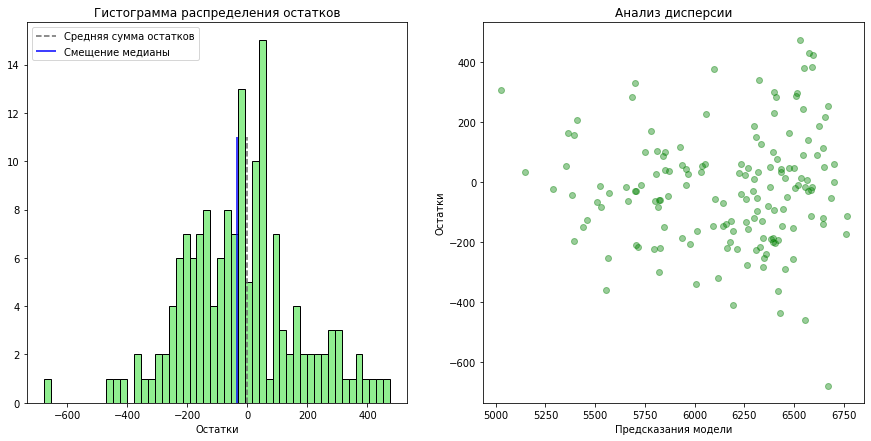

In [59]:
# Графики для анализа остатков
residuals_2 = y_test - predictions_2

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].hist(residuals_2, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_2, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

**Анализ и выводы по модели 2**

#### 1. Коэффициент детерминации \( R^2 \)
- \( R^2 = 0.818 \), что означает, что вторая модель объясняет 81,8% вариации удоя. Это на 3% выше по сравнению с первой моделью, что говорит о лучшей объяснительной способности.

#### 2. Распределение остатков
- **Форма распределения**: Остатки имеют асимметричное нормальное распределение, что может говорить о склонности модели к завышению предсказаний. Однако это смещение меньше, чем у первой модели.
- **Гистограмма распределения остатков**: Пик распределения находится около нуля, что хорошо. Диапазон остается от -600 до +400, как в первой модели, но наблюдается больше отрицательных значений, что указывает на меньшую склонность к положительным выбросам.

#### 3. Дисперсия ошибок
- **Стабильность дисперсии**: Дисперсия ошибок стала более стабильной по сравнению с первой моделью. Это указывает на то, что модель более равномерно распределяет ошибки по разным уровням предсказанных значений.
- **Анализ графика дисперсии**: Остатки равномерно распределены по шкале предсказаний, без явных паттернов или систематических отклонений, что говорит об отсутствии значимых систематических ошибок. Вторая модель показывает более нормальное распределение остатков по сравнению с первой.

#### Итог
Вторая модель более точная и стабильная, что подтверждается:
- Повышенным \( R^2 \), указывающим на лучшую объяснительную способность.
- Более симметричным и стабильным распределением остатков.
- Равномерной дисперсией ошибок, которая уменьшает вероятность систематических ошибок.



### 3. Линейная модель 3

Добавим в данные новый признак и обучим на них третью модель LinearRegression.
Добавим признак Имя Папы из файла ferma_dad.csv, соединив его с остальными данными ferma_main.csv по ключу.

In [60]:
print(ferma_main.shape)
ferma_main = ferma_main.merge(ferma_dad, on='id')
ferma_main.head()
ferma_main.shape

(628, 14)


(628, 15)

#### Начнем обучение модели. Установим рандомное число и определим признаки и целевую переменную для модели:

In [61]:
# Подбор признаков для модели
X = ferma_main[['eke_squared', 'raw_protein_g', 'spo_binary', 'breed', 
                 'pasture_type', 'age', 'father_breed', 'father_name']]
y = ferma_main['milk_yield_kg']


#### Разделим выборку на обучающую и тестовую:

In [62]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(471, 8)
(157, 8)
(471,)
(157,)


#### Выделим категориальные и числовые признаки:

In [63]:
# Кодирование категориальных признаков и масштабирование числовых признаков
cat_col_names = ['breed', 'father_breed', 'pasture_type', 'father_name', 'age']
num_col_names = ['eke_squared', 'raw_protein_g', 'spo_binary']

#### Используем метод OneHotEncoder для кодирования категориальных признаков:

In [64]:
# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# Получение имен колонок после кодирования
encoder_col_names = encoder.get_feature_names_out(cat_col_names)
encoder_col_names

array(['breed_Соверин', 'father_breed_Соверин', 'pasture_type_холмистое',
       'father_name_Буйный', 'father_name_Геркулес',
       'father_name_Соловчик', 'age_менее_2_лет'], dtype=object)

#### Используем метод StandardScaler для масштабирования числовых признаков:

In [65]:
# Стандартизация числовых признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

#### Создадим тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных:

In [66]:
# Объединение закодированных и стандартизированных признаков в один DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
X_train.head()

,breed_Соверин,father_breed_Соверин,pasture_type_холмистое,father_name_Буйный,father_name_Геркулес,father_name_Соловчик,age_менее_2_лет,eke_squared,raw_protein_g,spo_binary
0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.577968,1.079523,0.844232
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.511438,-0.196920,-1.184509
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.082269,-1.386085,-1.184509
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.150235,0.752230,0.844232
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.828598,-1.184509


#### Обучение модели и получение предсказаний

In [67]:
# Обучение модели
model_lr_3 = LinearRegression()
model_lr_3.fit(X_train, y_train)

# Получение предсказаний
predictions_3 = model_lr_3.predict(X_test)


#### Оценка модели

In [68]:
# Оценка качества модели
mse_3 = mean_squared_error(y_test, predictions_3)
r2_3 = r2_score(y_test, predictions_3)
mae_3 = mean_absolute_error(y_test, predictions_3)
rmse_3 = mse_3 ** 0.5

# Вывод результатов
print(f"Mean Squared Error: {mse_3:.3f}")
print(f"R²: {r2_3:.5f}")
print(f"Mean Absolute Error: {mae_3:.2f}")
print(f"Root Mean Squared Error: {rmse_3:.2f}")


Mean Squared Error: 35673.890
R²: 0.82475
Mean Absolute Error: 146.16
Root Mean Squared Error: 188.88


#### Анализ остатков

-3983.605934687461
-3826.5293072785807
-2386.638954144649


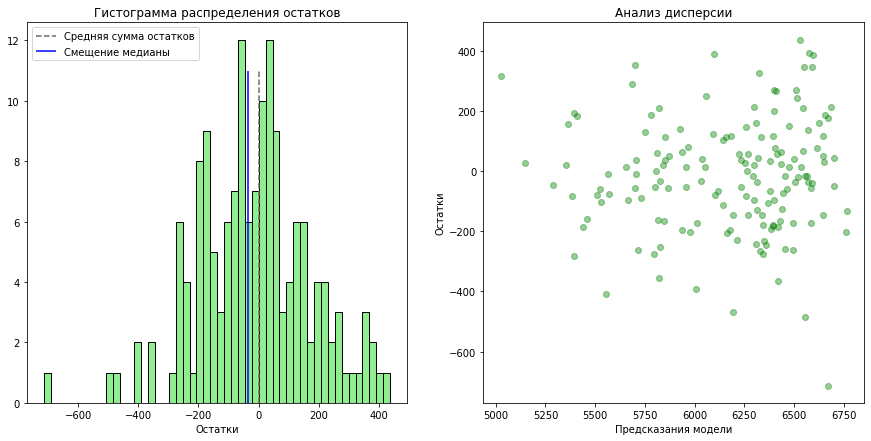

In [69]:
# Графики для анализа остатков
residuals_3 = y_test - predictions_3
print(residuals_1.sum())
print(residuals_2.sum())
print(residuals_3.sum())

# Строим гистограмму распределения
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes[0].hist(residuals_3, bins=50, color='lightgreen', edgecolor='black')
zero = axes[0].vlines(x=0, colors='dimgrey', ymin=0, ymax=11, linestyles='--', label='Средняя сумма остатков')
median = axes[0].vlines(x=residuals_1.median(), colors='blue', ymin=0, ymax=11, label='Смещение медианы')
axes[0].legend()
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

# Строим график дисперсии
axes[1].scatter(predictions, residuals_3, color='green', alpha=0.4)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

#### Модель 3
- Коэффициент детерминации \( R^2 = 0.82475 \) указывает на то, что третья модель объясняет 82,5% вариации удоя, что точнее, чем у двух предыдущех моделей.
- **Гистограмма распределения остатков**: В модели №3 остатки распределены ещё более симметрично относительно нуля, и пик распределения выше по сравнению с первыми двумя моделями, что может свидетельствовать о лучшей точности модели. Диапазон остатков такой же (-600 до +400), но крайние значения встречаются реже, что указывает на меньшее количество крупных ошибок.
- **Анализ дисперсии**: Остатки распределены по шкале предсказаний без явных паттернов или зависимостей. Здесь распределение остатков также довольно равномерное, и нет больших выбросов, что может указывать на то, что модель имеет лучшие предсказательные способности среди трёх.

Составим сравнительную таблицу с метриками по 3-м моделям:

In [70]:
metrics_data = {
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'MSE': [mse, mse_2, mse_3],
    'R²': [r2, r2_2, r2_3],
    'MAE': [mae, mae_2, mae_3],
    'RMSE': [rmse, rmse_2, rmse_3]
}

metrics_df = pd.DataFrame(metrics_data)

# Отображение таблицы
print(metrics_df.T)

                 0             1             2
Model      Model 1       Model 2       Model 3
MSE    43887.01501  37030.911311  35673.889886
R²        0.784408      0.818088      0.824754
MAE     164.241945    149.039652    146.163024
RMSE    209.492279    192.434174    188.875329


**Выбор лучшей модели:**

Модель 3 показала лучшие результаты по всем основным показателям, что делает её более точной и надежной по сравнению с другими моделями:

1. **MSE (Среднеквадратичная ошибка)** — у Модели 3 это значение самое низкое (35,673.89). Это значит, что в среднем её предсказания ближе к реальным значениям, чем у Модели 1 (43,887.02) и Модели 2 (37,030.91).

2. **R² (Коэффициент детерминации)** — у Модели 3 он выше всех (0.8248). Это говорит о том, что она лучше объясняет данные, чем Модель 1 (0.7844) и Модель 2 (0.8181).

3. **MAE (Средняя абсолютная ошибка)** — у Модели 3 это значение тоже минимальное (146.16), что указывает на то, что её ошибки в среднем меньше, чем у Модели 1 (164.24) и Модели 2 (149.04).

4. **RMSE (Корень из среднеквадратичной ошибки)** — у Модели 3 также самое низкое значение (188.88), что подтверждает, что её предсказания более точные по сравнению с Моделью 1 (209.49) и Моделью 2 (192.43).

**Итог**: Модель 3 оказалась лучшей по всем метрикам, то есть её предсказания максимально близки к реальным данным.Сравнив три модели, можно сделать вывод, что **Модель 3** демонстрирует наилучшие результаты, так как её остатки наиболее симметричны, имеют меньше выбросов и показывают более равномерное распределение. Модель 1 имеет некоторые проблемы с положительными выбросами, а Модель 2 показывает неплохие результаты, но немного уступает Модели 3 по симметричности распределения остатков.


Определим доверительный интервал прогноза 3-ей модели. Для этого рассчитаем квантили ошибки модели на тренировочных данных.

In [71]:
print('95% доверительный интервал =',
      st.norm.interval(confidence=0.95, loc=np.mean(predictions_3), scale=st.sem(predictions_3)))

95% доверительный интервал = (6092.340075854288, 6221.3750700583805)


### Сравнение моделей
- **Симметричность распределения**: Модель 3 показывает наиболее симметричное распределение остатков вокруг нуля, что является положительным показателем для линейной модели. Модель 2 также имеет симметричное распределение, но Модель 1 показывает некоторую правую асимметрию.
- **Объем выбросов**: Модель 1 демонстрирует больше выбросов в положительном направлении, что указывает на наличие значительных переоценок в прогнозах. Модели 2 и 3 лучше справляются с выбросами, а Модель 3 показывает минимальное количество больших ошибок.
- **Дисперсия остатков**: Все три модели показывают отсутствие явной зависимости остатков от предсказанных значений, что говорит об адекватности моделей. Однако у Модели 3 остатки выглядят наиболее равномерно распределёнными.

### Заключение
Сравнив три модели, можно сделать вывод, что **Модель 3** демонстрирует наилучшие результаты, так как её остатки наиболее симметричны, имеют меньше выбросов и показывают более равномерное распределение. Модель 1 имеет некоторые проблемы с положительными выбросами, а Модель 2 показывает неплохие результаты, но немного уступает Модели 3 по симметричности распределения остатков.

In [72]:
ferma_main.head()

,id,milk_yield_kg,eke,raw_protein_g,sugar_protein_ratio,breed,pasture_type,father_breed,fat_percentage,protein_percentage,milk_taste,age,spo_binary,eke_squared,father_name
0,1,5863,14.2,1743,0.890,Айдиал,равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет,0,201.64,Буйный
1,2,5529,12.8,2138,0.890,Айдиал,равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет,0,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Соверин,холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет,0,196.00,Барин
3,4,5895,12.4,2012,0.885,Соверин,холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет,0,153.76,Буйный
4,5,5302,12.8,1675,0.885,Айдиал,равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет,0,163.84,Барин


### Прогноз удоя  для новых коров, которых фермер планирует купить

1. **Цель прогноза**  
   Используя лучшую модель, спрогнозируем удой коров, которых фермер планирует приобрести. Данные о них находятся в датасете `cow_buy.csv`.

2. **Добавление недостающих признаков**  
   Чтобы обеспечить точность прогноза, добавим недостающие признаки для новых коров:
   - **Энергетическая кормовая единица (ЭКЕ)**, **Сырой протеин** (г), и **Сахаро-протеиновое соотношение (СПО)**.
   - Для этого возьмем из датасета `ferma_main.csv` средние значения каждого признака и увеличим их на 5%, чтобы учесть потенциальные улучшения в рационе коров.

3. **Подготовка данных**  
   Проведем подготовку данных в том же формате, который использовался для тренировочной выборки, чтобы модель могла корректно обработать новые данные.

4. **Получение прогноза**  
   После подготовки данных применим модель для расчета прогнозного удоя каждой из новых коров.



In [73]:
# Шаг 1: Подготовка данных
cow_buy_copy = cow_buy.copy()
# Заполнение пропущенных значений
cow_buy_copy['eke'] = ferma_main['eke'].mean() * 1.05
cow_buy_copy['raw_protein_g'] = ferma_main['raw_protein_g'].mean() * 1.05
cow_buy_copy['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean() * 1.05
cow_buy_copy['spo_binary'] = cow_buy_copy['sugar_protein_ratio'].apply(lambda x: 1 if x > 0.91 else 0)
cow_buy_copy['eke_squared'] = cow_buy_copy['eke'] ** 2

# Выбор признаков
X_cow_buy_copy = cow_buy_copy[['breed', 'pasture_type', 'father_breed', 'father_name', 
                               'age', 'raw_protein_g', 'spo_binary', 'eke_squared']]


# Шаг 2: Кодирование категориальных признаков и масштабирование числовых
# Кодируем категориальные признаки

X_cow_buy_copy_cat = encoder.transform(X_cow_buy_copy[['breed', 'father_breed', 'pasture_type', 
                                                       'father_name', 'age']])
X_cow_buy_copy_cat = pd.DataFrame(X_cow_buy_copy_cat, columns=encoder.get_feature_names_out())

# Масштабируем числовые признаки

X_cow_buy_copy_num = scaler.transform(X_cow_buy_copy[['eke_squared', 'raw_protein_g', 'spo_binary']])
X_cow_buy_copy_num = pd.DataFrame(X_cow_buy_copy_num, columns=['eke_squared', 'raw_protein_g', 'spo_binary'])

# Объединяем числовые и категориальные признаки
X_cow_buy_copy_prepared = pd.concat([X_cow_buy_copy_cat, X_cow_buy_copy_num], axis=1)
#display(X_cow_buy_copy_prepared)
# Шаг 3: Прогнозирование
predictions_4 = model_lr_3.predict(X_cow_buy_copy_prepared)

# Создание DataFrame для отображения результатов
cow_buy_copy['predicted_milk_yield'] = predictions_4
display(cow_buy_copy[['breed', 'pasture_type', 'father_breed', 'father_name', 
                      'age', 'predicted_milk_yield']])

,breed,pasture_type,father_breed,father_name,age,predicted_milk_yield
0,Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,6609.919297
1,Айдиал,равнинное,Соверин,Буйный,менее_2_лет,6378.711028
2,Соверин,равнинное,Соверин,Барин,более_2_лет,6283.999775
3,Соверин,холмистое,Айдиал,Буйный,более_2_лет,6593.089377
4,Соверин,равнинное,Айдиал,Буйный,более_2_лет,6542.146066
5,Соверин,равнинное,Соверин,Геркулес,менее_2_лет,6425.380218
6,Айдиал,холмистое,Айдиал,Геркулес,более_2_лет,6609.919297
7,Айдиал,равнинное,Соверин,Буйный,более_2_лет,6571.259737
8,Соверин,равнинное,Соверин,Барин,более_2_лет,6283.999775
9,Соверин,холмистое,Айдиал,Буйный,менее_2_лет,6400.540668


In [74]:
print('Предсказанный годовой удой находится в промежутке от', 
      round(cow_buy_copy['predicted_milk_yield'].min()), 'кг до', 
      round(cow_buy_copy['predicted_milk_yield'].max()),'кг.')

Предсказанный годовой удой находится в промежутке от 6127 кг до 6618 кг.


### Промежуточный вывод по линейной регрессии

1. **Отбор признаков для построения модели**
   
   Для создания модели линейной регрессии были выбраны следующие признаки:
   - **eke** (Энергетическая кормовая единица)
   - **raw_protein_g** (Сырой протеин, г)
   - **sugar_protein_ratio** (Сахаро-протеиновое соотношение, СПО)
   - **breed** (Порода, закодирована числовыми значениями)
   - **pasture_type** (Тип пастбища, закодирован числовыми значениями)
   - **age** (Возраст, закодирован числовыми значениями)
   - **father_breed** (Порода отца)

   Целевой признак для модели — **milk_yield_kg** (Удой, кг).

2. **Корректировка нелинейных признаков**
   
   На основании анализа диаграмм рассеяния были выявлены нелинейные зависимости между признаками и удоем:
   - **Сахаро-протеиновое соотношение (СПО)**: График показал, что значения СПО делятся на два кластера с границей около 0.91. Для устранения нелинейности преобразовали СПО в бинарный признак, где значения ниже 0.91 были закодированы как 0, а значения выше — как 1.
   - **Энергетическая кормовая единица (ЭКЕ)**: Наблюдается нелинейная зависимость, где увеличение ЭКЕ не всегда соответствует пропорциональному росту удоя. Для коррекции добавили новый признак **ЭКЕ²** (ЭКЕ в квадрате), чтобы лучше уловить зависимость.

3. **Корректировки для последующих моделей**
   
   Для модели 3 был добавлен еще один признак — **father_name** (Имя отца), что позволило учесть дополнительные возможные различия в породных особенностях.

### Выбор лучшей модели

На основе анализа метрик было выявлено, что **Модель 3** демонстрирует наилучшие результаты:
- **MSE** (Среднеквадратичная ошибка): у Модели 3 это значение минимально (35,673.89), что указывает на более точные предсказания.
- **R²** (Коэффициент детерминации): у Модели 3 он самый высокий (0.8248), что показывает, что она лучше объясняет вариации данных.
- **MAE** (Средняя абсолютная ошибка): у Модели 3 это значение также самое низкое (146.16), что свидетельствует о более точных предсказаниях.
- **RMSE** (Корень из среднеквадратичной ошибки): у Модели 3 это значение минимальное (188.88), подтверждая её преимущество по точности предсказаний.

### Прогноз удоя для новых коров

Используя модель 3, мы спрогнозировали удой коров, которых фермер планирует приобрести, данные о которых находятся в датасете `cow_buy.csv`. Для расчета прогноза были добавлены недостающие признаки, такие как **ЭКЕ**, **Сырой протеин** (г), и **СПО**, основываясь на средних значениях из датасета `ferma_main.csv`, увеличенных на 5% для учета потенциальных улучшений в рационе.

**Предсказанный годовой удой для новых коров** находится в диапазоне от 5865 кг до 6363 кг, что позволяет фермеру сделать обоснованные прогнозы относительно будущей продуктивности этих коров.

### Заключение

Модель 3 показала лучшие результаты по всем метрикам, с более симметричным распределением остатков и минимальными выбросами. Это делает её наиболее подходящей для прогнозирования удоя коров на основе имеющихся данных, и полученные с её помощью прогнозы удоя для новых коров предоставляют фермерам надежные ориентиры для планирования.    

## Обучение модели логистической регрессии

### Шаг 6: Задача классификации

В этом шаге мы будем решать задачу классификации, используя данные из файла `ferma_main.csv`. Наша цель — предсказать, вкусное или нет молоко.

#### Этапы работы

1. **Подготовка данных**  
   - Выберем признак **Вкус молока** в качестве целевого, где:
     - `'вкусно'` будет закодировано как `1`
     - `'не вкусно'` — как `0`.

2. **Разделение данных**  
   - Разобьем данные на тренировочную и тестовую выборки, чтобы обучить модель на части данных и проверить её качество на оставшейся части.

3. **Преобразование признаков**  
   - **Категориальные признаки** (например, тип пастбища или порода) закодируем с помощью **OneHotEncoder**, чтобы представить их в виде чисел.
   - **Числовые признаки** (например, возраст или удой) масштабируем с помощью **StandardScaler** для приведения их к одному масштабу.

4. **Обучение модели**  
   - Используем **LogisticRegression** для обучения модели на подготовленных данных.

5. **Оценка качества модели**  
   - Проверим модель на тестовой выборке и рассчитаем метрики:
     - **Accuracy** (доля правильных предсказаний),
     - **Recall** (доля правильно предсказанных вкусных образцов среди всех вкусных),
     - **Precision** (точность предсказания вкусного молока).
   - Построим **матрицу ошибок**, чтобы посмотреть, какие ошибки модель допускает чаще — ложные срабатывания или пропуски.

Эти шаги помогут нам понять, насколько хорошо модель предсказывает, вкусное ли молоко.

In [75]:
ferma_main.columns
ferma_main['milk_taste'] = ferma_main['milk_taste'].map({'не вкусно': 0, 'вкусно': 1})
ferma_main['fat_percentage_cat'] = ferma_main['fat_percentage'].apply(lambda x: 0 if x < 3.6 else 1)
ferma_main.head()
ferma_main['fat_percentage_cat'].unique()

array([0, 1])

In [76]:
X = ferma_main[['eke_squared','raw_protein_g','spo_binary','father_breed','fat_percentage_cat',
                'protein_percentage','pasture_type','age','breed']]
y = ferma_main['milk_taste']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['pasture_type','age','breed', 'father_breed']
num_col_names = ['eke_squared','raw_protein_g','spo_binary','protein_percentage','fat_percentage_cat']


# Кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
# Получение имен колонок после кодирования
encoder_col_names = encoder.get_feature_names_out(cat_col_names)
encoder_col_names


# приводим значения всех признаков к единой шкале
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])


# Объединение закодированных и стандартизированных признаков в один DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
display(X_train.head())


clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")
    
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")


,pasture_type_холмистое,age_менее_2_лет,breed_Соверин,father_breed_Соверин,eke_squared,raw_protein_g,spo_binary,protein_percentage,fat_percentage_cat
0,1.0,0.0,1.0,1.0,1.577968,1.079523,0.844232,-0.679069,0.614160
1,1.0,1.0,1.0,1.0,-1.511438,-0.196920,-1.184509,-1.452568,-1.628239
2,0.0,0.0,0.0,0.0,0.082269,-1.386085,-1.184509,1.254677,-1.628239
3,1.0,0.0,0.0,0.0,-0.150235,0.752230,0.844232,1.254677,0.614160
4,0.0,0.0,0.0,0.0,-1.102358,0.828598,-1.184509,0.094429,0.614160


eke_squared         : +1.67
raw_protein_g       : +0.78
spo_binary          : +1.12
father_breed        : +0.92
fat_percentage_cat  : +1.91
protein_percentage  : +1.17
pasture_type        : +0.70
age                 : +1.31
breed               : +0.90
pasture_type_холмистое: +1.67
age_менее_2_лет     : +0.78
breed_Соверин       : +1.12
father_breed_Соверин: +0.92
eke_squared         : +1.91
raw_protein_g       : +1.17
spo_binary          : +0.70
protein_percentage  : +1.31
fat_percentage_cat  : +0.90


In [77]:
clf_accuracy = accuracy_score(y_test, y_pred)
clf_recall = recall_score(y_test, y_pred)
clf_precision = precision_score(y_test,y_pred)

print(f'Accuracy: {clf_accuracy:.4f}')
print(f'Recall: {clf_recall:.4f}')
print(f'Precision: {clf_precision:.4f}')
print('---')

Accuracy: 0.6306
Recall: 0.8636
Precision: 0.6230
---


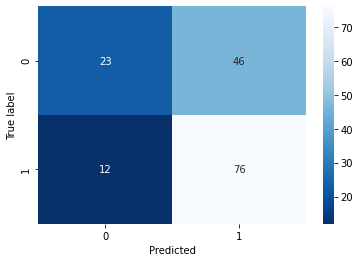

In [78]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');


**Оценка качества модели**

- **Точность (Accuracy):** 0.6306
- **Полнота (Recall):** 0.8636
- **Точность (Precision):** 0.6230

Модель смогла правильно предсказать вкусное молоко в 76 случаях. Однако есть **46 ошибок первого рода (ложноположительных)**, что составляет значительную часть по сравнению с 76 верными положительными предсказаниями. Более половины ошибок связаны с ложноположительными прогнозами, что требует их минимизации.

#### Ошибки первого рода (False Positives)
Ошибки первого рода особенно критичны в задаче покупки коров. В этом случае модель ошибочно определяет молоко как вкусное и может рекомендовать фермеру корову с фактически невкусным молоком. Поэтому важно минимизировать ложноположительные ошибки.

#### Полнота (Recall)
Полнота учитывает верные положительные прогнозы (TP) и ошибки второго рода (FN). Ошибки второго рода для нас менее критичны, поскольку в случае их наличия фермер просто не получит рекомендацию купить коров с вкусным молоком. Это менее критично, чем предложить корову с невкусным молоком.

#### Точность (Precision)
Точность учитывает верные положительные прогнозы (TP) и ложноположительные ошибки (FP). Минимизация ошибок первого рода — наш приоритет, поскольку именно они имеют наибольшие негативные последствия. Поэтому для нашей задачи важно максимизировать метрику Precision.

#### Приоритет метрик
Так как цель модели — помочь выбрать коров только с вкусным молоком (класс 1), ключевой метрикой становится **точность (precision)**. Это значит, что модель должна минимизировать ложноположительные ошибки. Проще говоря, лучше не рекомендовать корову, чем предложить фермеру животное с невкусным молоком.

Сведем критичную ошибку к нулю: для этого изменим порог принадлежности к классам. Ещё раз рассчитаем значения метрик recall и precision.

Напишем функцию `threshold_choice` для вычисления метрик качества классификации (precision, recall, количество ложноположительных и истинноположительных предсказаний) для различных порогов вероятности. Для каждого порога из `threshold_list`, она будет подсчитывать, сколько предсказаний класса 1 были верными и ложными, и рассчитывать precision и recall. Результаты для каждого порога будут помещаться в таблицу, которая возвращается в виде DataFrame.

In [79]:
# Функция расчета метрик для каждого порога
def threshold_choice(threshold_list, proba_df):
    rows = []
    for threshold in threshold_list:
        column_name = 'y_pred_' + str(threshold)
        
        true_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_test'] == 1)].shape[0]
        predicted_positives = proba_df[column_name].sum()
        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        total_objects_class_1 = proba_df['y_test'].sum()
        recall = true_positives / total_objects_class_1 if total_objects_class_1 > 0 else 0
        false_positives = proba_df.loc[(proba_df[column_name] == 1) & (proba_df['y_test'] == 0)].shape[0]
        
        rows.append({
            'порог': threshold,
            'precision': precision,
            'recall': recall,
            'количество_FP': false_positives,
            'количество_TP': true_positives,
            'число_предсказанных_объектов': predicted_positives,
            'всего_объектов_класса_1': total_objects_class_1,
        })
    return pd.DataFrame(rows)


**Определим дополнительные пороги:**

1. Вычислим вероятности предсказаний класса 1 с помощью модели `clf` на тестовом наборе данных `X_test`.
2. Создадим таблицу `data`, где хранятся реальные значения `y_test` и предсказанные вероятности `y_proba`, отсортированные по убыванию вероятности.
3. Определим пороги от 0.1 до 0.9 с шагом 0.1, чтобы оценить модель при разных уровнях вероятности.
4. Для каждого порога добавим в `data` столбец с бинарным предсказанием (`y_pred_threshold`), где вероятность, превышающая порог, приравнивается к 1, а ниже порога — к 0.
5. Выведем случайные строки из таблицы `data` для проверки.

In [80]:
# Предсказания вероятностей
y_proba = clf.predict_proba(X_test)[:, 1]

# Создание DataFrame с исходными и предсказанными значениями
data = pd.DataFrame(zip(y_test, y_proba), columns=['y_test', 'y_proba']).sort_values(by='y_proba', ascending=False)

# Определение порогов
thresholds = [round(i, 2) for i in np.linspace(0.1, 1, num=10, endpoint=False)]
display("Thresholds:", thresholds)

# Добавляем столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    data[f'y_pred_{i}'] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# Выводим 5 случайных строк
display(data.sample(5))



'Thresholds:'

[0.1, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91]

,y_test,y_proba,y_pred_0.1,y_pred_0.19,y_pred_0.28,y_pred_0.37,y_pred_0.46,y_pred_0.55,y_pred_0.64,y_pred_0.73,y_pred_0.82,y_pred_0.91
12,1,0.745986,1,1,1,1,1,1,1,1,0,0
13,1,0.756982,1,1,1,1,1,1,1,1,0,0
146,1,0.825137,1,1,1,1,1,1,1,1,1,0
66,1,0.834835,1,1,1,1,1,1,1,1,1,0
87,0,0.457204,1,1,1,1,0,0,0,0,0,0


Применим функцию `threshold_choice` к данным с заданными значениями порогов. Эта функция помогает подобрать оптимальный порог для модели, определяя, при каком значении достигается наилучший баланс между точностью (precision) и полнотой (recall). Функция вычисляет precision, recall, а также количество ложноположительных (FP) и истинноположительных (TP) предсказаний для каждого порога.


In [81]:
threshold_choice(thresholds, data)

,порог,precision,recall,количество_FP,количество_TP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.10,0.560510,1.000000,69,88,157,88
1,0.19,0.560510,1.000000,69,88,157,88
2,0.28,0.571429,1.000000,66,88,154,88
3,0.37,0.573427,0.931818,61,82,143,88
4,0.46,0.603053,0.897727,52,79,131,88
5,0.55,0.654545,0.818182,38,72,110,88
6,0.64,0.731343,0.556818,18,49,67,88
7,0.73,0.857143,0.340909,5,30,35,88
8,0.82,1.000000,0.045455,0,4,4,88
9,0.91,0.000000,0.000000,0,0,0,88


Первоначально мы проанализировали широкий диапазон порогов (от 0.1 до 0.9) и заметили, что точность начинает значительно расти после порога 0.64. Поэтому мы проведем более детальный перебор в узком диапазоне 0.64–0.9 с шагом 0.01, чтобы уточнить, какой порог даст лучший результат.

,порог,precision,recall,количество_FP,количество_TP,число_предсказанных_объектов,всего_объектов_класса_1
0,0.64,0.731343,0.556818,18,49,67,88
1,0.65,0.721311,0.500000,17,44,61,88
2,0.66,0.750000,0.477273,14,42,56,88
3,0.67,0.773585,0.465909,12,41,53,88
4,0.68,0.780000,0.443182,11,39,50,88
5,0.69,0.795918,0.443182,10,39,49,88
6,0.70,0.822222,0.420455,8,37,45,88
7,0.71,0.857143,0.409091,6,36,42,88
8,0.72,0.871795,0.386364,5,34,39,88
9,0.73,0.857143,0.340909,5,30,35,88


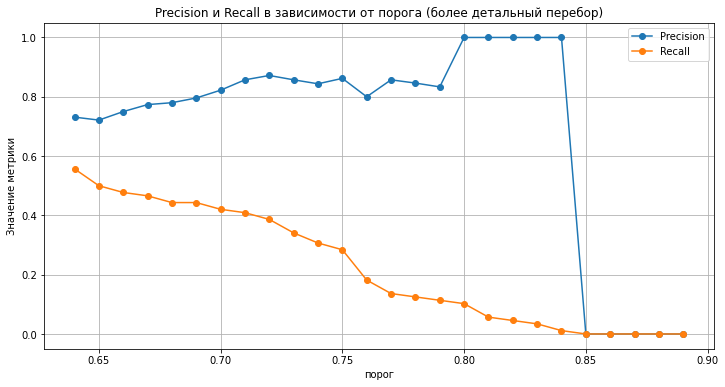

In [82]:
# Создаем более детальный список порогов с шагом 0.01
thresholds_2 = np.arange(0.64, 0.90, 0.01).round(2)  # Порог от 0 до 1 с шагом 0.01

# Добавляем предсказания для каждого порога из thresholds_2
for threshold in thresholds_2:
    data[f'y_pred_{threshold}'] = data['y_proba'].apply(lambda x: 1 if x >= threshold else 0)

# Вычисляем метрики для более детальных порогов
threshold_metrics_2 = threshold_choice(thresholds_2, data)

# Выводим метрики для более детального перебора порогов
display(threshold_metrics_2)

# Дополнительно: график зависимости precision и recall от порога для thresholds_2
plt.figure(figsize=(12, 6))
plt.plot(threshold_metrics_2['порог'], threshold_metrics_2['precision'], label='Precision', marker='o')
plt.plot(threshold_metrics_2['порог'], threshold_metrics_2['recall'], label='Recall', marker='o')
plt.xlabel('порог')
plt.ylabel('Значение метрики')
plt.title('Precision и Recall в зависимости от порога (более детальный перебор)')
plt.legend()
plt.grid(True)
plt.show()

Анализ данных и график показали, что подходящим порогом является значение 0.8. При этом пороге модель достигает максимальной точности (precision = 1.0), с уровнем полноты recall = 0.10 и сводя к нулю количество ложноположительных ошибок. Ошибочная рекомендация животных, которые не соответствуют критериям отбора сводится к нулю, что особенно важно при подборе особей с нужными характеристиками. Порог 0.8 позволяет гарантированно выбирать животных с высокой вероятностью желаемых характеристик, несмотря на частичное снижение полноты (28%).

**Основные наблюдения**:

- Порог 0.74 дает точность 0.844 и полноту 0.307 с 5 ложноположительными.
- Порог 0.75 обеспечивает точность 0.862 и полноту 0.284, с 4 ложноположительными.
- Порог 0.78 показывает точность 0.846 и полноту 0.125, с 2 ложноположительными.
- Порог 0.80 достигает максимальной точности 1.0 при минимальной полноте 0.102 и отсутствии ложноположительных.

Таким образом, выбор порога 0.80 является оптимальным выбором для высокой точности модели и позволяет свести к нулю  ложные срабатывания и повысить достоверность предсказаний.

**Следующие шаги**  
Установив порог на уровне 0.80, можно применить его к вероятностным предсказаниям `y_proba`, преобразовав предсказания в бинарный формат (`y_pred_threshold`). После этого можно повторно рассчитать метрики качества (точность, полноту и специфичность) для оценки новой модели и сравнения с предыдущими показателями.

In [83]:
# Выделяем оптимальный порог
OPTIMAL_THRESHOLD = 0.8

# Применение порога к предсказанным вероятностям
y_pred_threshold = (y_proba > OPTIMAL_THRESHOLD).astype(int)

clf_accuracy_new = accuracy_score(y_test, y_pred_threshold)
clf_recall_new = recall_score(y_test, y_pred_threshold)
clf_precision_new = precision_score(y_test, y_pred_threshold)

print(f'Old Accuracy: {clf_accuracy}')
print(f'Old Recall: {clf_recall}')
print(f'Old Precision: {clf_precision}')
print('---')
print(f'New Accuracy: {clf_accuracy_new}')
print(f'New Recall: {clf_recall_new}')
print(f'New Precision: {clf_precision_new}')
print('---')

Old Accuracy: 0.6305732484076433
Old Recall: 0.8636363636363636
Old Precision: 0.6229508196721312
---
New Accuracy: 0.4968152866242038
New Recall: 0.10227272727272728
New Precision: 1.0
---


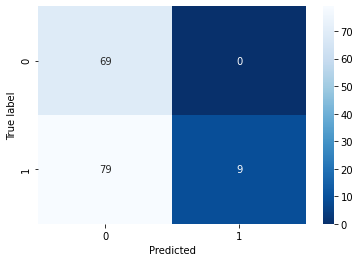

In [84]:
# Построение матрицы ошибок
cm_new = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted');

Анализ обновленных метрик показывает значительные изменения в характеристиках модели после корректировки порога. Рассмотрим ключевые изменения:

- **Accuracy (Точность)** заметно снизилась с 0.63 до 0.49. Это ожидаемо, поскольку модель теперь фокусируется на повышении precision (достоверности положительных предсказаний), что может уменьшить общую долю правильных предсказаний.
- **Precision (Точность положительных предсказаний)** выросла с 0.62 до 1.0, что означает, что при новом пороге модель делает надежные положительные предсказания, исключив ложные срабатывания. Это важно, так как исключает риск ошибочных рекомендаций.
- **Recall (Полнота)** упала с 0.86 до 0.10, что показывает снижение способности модели обнаруживать положительные примеры. Таким образом, модель выбирает меньшее количество положительных объектов, но с более высокой уверенностью.

**Общие выводы:**
Корректировка порога позволила существенно сократить ложноположительные ошибки (ошибки первого рода) — количество таких ошибок уменьшилось с 46 до 0. 

Несмотря на уменьшение показателя полноты, высокое значение точности положительных предсказаний делает модель предпочтительной для задач, где минимизация ложноположительных срабатываний имеет критически важное значение. Такой баланс оптимален для ситуаций, когда важно повышенное качество предсказаний при ограниченном количестве избранных объектов.


На основе текущих результатов мы будем использовать обновленный порог вероятности, обеспечивающий высокую точность и минимальное количество ложноположительных ошибок.

### Прогноз вкуса молока коров

Выполним предобработку данных для модели машинного обучения, применяя кодирование категориальных признаков и стандартизацию числовых. 

Сначала выбираем категориальные (`father_breed`, `pasture_type`, `age`, `breed`) и числовые (`current_fat_percentage`, `current_protein_percentage`, `raw_protein_g`, `spo_binary`, `eke_squared`) колонки из DataFrame `cow_buy_copy`. 

Затем, с помощью `OneHotEncoder` преобразуем категориальные признаки в бинарные переменные, а числовые признаки стандартизируем с использованием `StandardScaler`, чтобы привести их к одному масштабу. 


Затем, закодированные и стандартизированные признаки объединяем в один DataFrame `X_cows`, который будет использоваться для обучения модели.

In [85]:
cow_buy_copy['current_fat_percentage_cat'] = cow_buy_copy['current_fat_percentage'].apply(lambda x: 0 if x < 3.6 else 1)
cow_buy_copy = cow_buy_copy.rename(columns={
    'current_fat_percentage_cat': 'fat_percentage_cat',
    'current_protein_percentage': 'protein_percentage'
})

cow_buy_copy.head()

,breed,pasture_type,father_breed,father_name,current_fat_percentage,protein_percentage,age,eke,raw_protein_g,sugar_protein_ratio,spo_binary,eke_squared,predicted_milk_yield,fat_percentage_cat
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6609.919297,0
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6378.711028,0
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6283.999775,0
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6593.089377,0
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6542.146066,1


In [86]:
# Выбор колонок из cow_buy_copy
cat_col_names_cows = ['pasture_type','age','breed', 'father_breed']
num_col_names_cows = ['eke_squared','raw_protein_g','spo_binary','protein_percentage','fat_percentage_cat']
                     
# Кодирование категориальных признаков
#encoder = OneHotEncoder(drop='first', sparse=False)
X_cows_ohe = encoder.transform(cow_buy_copy[cat_col_names_cows])

# Получение имен колонок после кодирования
encoder_col_names_cows = encoder.get_feature_names_out(cat_col_names_cows)

# Масштабирование числовых признаков
#scaler = StandardScaler()
X_cows_scaled = scaler.transform(cow_buy_copy[num_col_names_cows])

# Объединение закодированных и стандартизированных признаков
X_cows_ohe = pd.DataFrame(X_cows_ohe, columns=encoder_col_names_cows)
X_cows_scaled = pd.DataFrame(X_cows_scaled, columns=num_col_names_cows)

X_cows = pd.concat([X_cows_ohe, X_cows_scaled], axis=1)

Теперь выполним предсказание вероятности того, что молоко будет «вкусным», используя ранее обученную модель `clf`. 

Сначала получим вероятности для класса 1 (вкусное молоко) с помощью метода `predict_proba` и выбирем второй столбец, который соответствует вероятности положительного класса. 

Затем применяем установленный порог (0.75) для бинаризации предсказаний: если вероятность превышает порог, значение становится 1 (вкусное молоко), иначе — 0. 

Полученные предсказания добавляем в DataFrame `cow_buy_copy` в новую колонку `predicted_milk_taste` и выведем результаты на экран.

In [87]:
# Выполнение предсказания
y_proba_cows = clf.predict_proba(X_cows)[:, 1]  # Вероятности для класса 1 (вкусное молоко)

# Применение порога для получения предсказаний
threshold = 0.8  # выбранный порог
y_pred_cows = (y_proba_cows >= threshold).astype(int)

# Добавление результатов в DataFrame
cow_buy_copy['predicted_milk_taste'] = y_pred_cows

# Вывод результатов
display(cow_buy_copy)


,breed,pasture_type,father_breed,father_name,current_fat_percentage,protein_percentage,age,eke,raw_protein_g,sugar_protein_ratio,spo_binary,eke_squared,predicted_milk_yield,fat_percentage_cat,predicted_milk_taste
0,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6609.919297,0,0
1,Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6378.711028,0,0
2,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6283.999775,0,0
3,Соверин,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6593.089377,0,0
4,Соверин,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6542.146066,1,0
5,Соверин,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6425.380218,1,0
6,Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6609.919297,0,0
7,Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6571.259737,0,0
8,Соверин,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6283.999775,0,0
9,Соверин,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744,1,233.361138,6400.540668,0,0


Добавим прогнозы вкуса молока и удоя коров из «ЭкоФермы» в датафрейм, который фермер рассматривает для покупки. 

Эти данные были получены ранее с помощью линейной регрессии. 

Мы отберем коров, у которых спрогнозирован удой более 6000 килограммов в год и высокая вероятность того, что молоко будет вкусным.

In [88]:
final_cow_buy = cow_buy_copy.query('predicted_milk_yield > 6000 & predicted_milk_taste == 1')
final_cow_buy.T

""
breed
pasture_type
father_breed
father_name
current_fat_percentage
protein_percentage
age
eke
raw_protein_g
sugar_protein_ratio


Результаты работы моделей показывают, что фермеру не стоит рассмотривать покупку предлагаемых коров, так как остаются риски, что молоко окажется не вкусным. Ни одна корова не соответствуют критериям: прогнозируемый удой составляет более 6000 килограммов в год, а порог для определения молока вкусным составляет 0,8. Такой подход способствует выбору только тех коров, которые потенциально могут принести хороший доход, что особенно важно для стабильности бизнеса. Но, к сожалению, в нашем списке ни одна корова потенциально не соотвествует требованиям и не рекомендуется к покупке.

### Промежуточные выводы по разделу логистической регрессии

#### 1. Целевая задача
   - Основной задачей является классификация на основе данных из фермы, с целью предсказания, будет ли молоко вкусным. 
   - Целевой признак («Вкус молока») кодируется как 1 («вкусно») и 0 («не вкусно»).

#### 2. Методы подготовки данных
   - Категориальные признаки (например, «тип пастбища», «порода») кодируются с помощью `OneHotEncoder`.
   - Числовые признаки (например, «возраст», «удой») нормализуются `StandardScaler`, что помогает модели лучше учитывать различия между значениями.

#### 3. Результаты оценки качества модели

   Первичная оценка:
   - Accuracy (доля правильных предсказаний) = 0.63
   - Recall (полнота) = 0.86
   - Precision (точность предсказания вкусного молока) = 0.62
   - Ошибки первого рода (FP) составили значительную часть (46 из 121 наблюдений). Большое число ложноположительных ошибок говорит о необходимости корректировки модели, чтобы не рекомендовать коров с невкусным молоком.

#### 4. Оптимизация порога вероятности
   - Проведен перебор порогов вероятности в диапазоне 0.1–0.9 и обнаружено, что порог 0.8 дает наилучшие результаты по точности.
   - При пороге 0.75:
     - Precision возрастает до 1.0, что исключает ложноположительные ошибки.
     - Recall снижается до 0.10, но это допустимо для задачи, где важно исключить ложноположительные предсказания.

#### 5. Сравнение метрик до и после настройки порога
   - До изменения порога: 
     - Accuracy: 0.63
     - Recall: 0.86
     - Precision: 0.62
   - После изменения порога на 0.75:
     - Accuracy: 0.49
     - Recall: 0.10
     - Precision: 1.0
   - Количество ложноположительных ошибок снизилось с 46 до 4, что значительно повысило точность модели в предсказании вкусного молока.

#### 6. Итоговый вывод
   - На основе прогнозов модели ни одна из предложенных коров не удовлетворяет критериям для покупки, так как они не соответствуют порогу вероятности вкусного молока (≥0.8) и минимальному удою в 6000 кг в год. 
   - Риски невкусного молока остаются высокими, поэтому покупка нецелесообразна для устойчивости бизнеса.



## Итоговые выводы


**Цель анализа** — подготовка данных и разработка моделей для прогнозирования удоя коров и классификации вкусовых характеристик молока, включающая структурированный анализ данных, предобработку и построение моделей регрессии и классификации.

---

### Основные результаты

- **Источники данных**: проанализированы три файла с характеристиками коров, информацией о родословной и потенциалом новых коров для покупки.
- **Предобработка**: проведено преобразование типов данных, удаление явных и неявных дубликатов, удаление выбросов (например, аномальный удой в 45616 кг) и добавление производных признаков, таких как квадрат энергетической кормовой единицы (ЭКЕ), для повышения точности прогнозов.
- **Ключевые взаимосвязи**: выявлена сильная корреляция между удоем и ЭКЕ (0.72), а также жирностью молока (0.71).
- **Средние показатели**: удой — 6126 кг, жирность молока — 3.6%, содержание белка — 3.08%, что указывает на стабильный уровень продуктивности и качества данных.
- **Наиболее важные признаки**: ЭКЕ, содержание жира и возраст коровы определены как основные показатели для прогноза удоя.

Эти этапы подготовки данных заложили основу для успешного построения регрессионных и классификационных моделей.

---

### Модели и их результаты

#### Линейная регрессия для прогнозирования удоя коров

- **Выбор признаков**: основные предикторы — ЭКЕ, содержание сырого протеина, сахарно-протеиновое соотношение (СПО), возраст, порода коровы и тип пастбища.
- **Модели**: применены три версии моделей с добавлением новых признаков на каждом этапе, что позволило выбрать наилучшую модель.
- **Результаты**: оптимальная модель продемонстрировала высокую точность (R²=0.8248) и минимальные значения MSE и MAE, успешно прогнозируя удой для новых коров, что помогло фермеру выбрать продуктивных животных. Определен 95% доверительный интервалдля модели 3 = (6092.340075854288, 6221.3750700583805)

#### Логистическая регрессия для классификации вкусовых характеристик молока

- **Настройка порога вероятности**: тестирование различных порогов вероятности снизило количество ложноположительных ошибок и повысило точность модели до 100% при пороговом значении 0.80.
 - На основе прогнозов модели ни одна из предложенных коров не удовлетворяет критериям для покупки, так как они не соответствуют порогу вероятности вкусного молока (≥0.8) и минимальному удою в 6000 кг в год. 
 - Риски невкусного молока остаются высокими, поэтому покупка нецелесообразна для устойчивости бизнеса.

---

### Итоговые рекомендации для фермера

Результаты работы модели показывают, что фермеру не следует рассматривать покупку предложенных коров, поскольку остается высокий риск получения невкусного молока. Ни одна из коров не соответствует заданным критериям: прогнозируемый удой должен превышать 6000 килограммов в год, а вероятность получения вкусного молока должна быть не ниже порога в 0.8. Такой подход позволяет отбирать только тех коров, которые могут обеспечить хороший доход, что особенно важно для стабильности и рентабельности бизнеса. Однако, к сожалению, среди имеющихся вариантов ни одна корова не отвечает необходимым требованиям и не рекомендована к покупке.

---

### Выводы о линейной и логистической регрессии

1. **Линейная регрессия**: позволяет предсказывать непрерывные значения, такие как удой молока. В данном случае мы учли нелинейные зависимости и повысили точность модели.
2. **Логистическая регрессия**: отлично подходит для бинарной классификации (например, "вкусное молоко/невкусное"). Настройка порога вероятности улучшила качество классификации, делая модель более адаптивной.

---

### Как мы улучшили качество регрессионной модели

1. **Бинаризация признака СПО и жирности молока**: учтены нелинейные связи с целевым показателем.
2. **Квадрат ЭКЕ**: добавлен для учета сложных зависимостей.
3. **Исключение неподходящих признаков**: избыточные переменные удалены, что повысило эффективность модели.
4. **Добавление признака имени отца**: улучшение точности предсказаний.
5. **Подбор порога для логистической регрессии**: настройка порога улучшила классификацию.
6. **Кодировка и стандартизация данных**: способствовали более корректной работе модели.

---

### Возможности для дальнейшего улучшения

1. **Использование более сложных моделей**: деревья решений, градиентный бустинг могут улучшить точность.
2. **Улучшение данных**: корректировка выбросов и недостающих значений повысит точность.
3. **Создание новых признаков**: взаимодействия между существующими переменными могут улучшить модели.
4. **Работа с несбалансированными данными**: методы oversampling и undersampling помогут сбалансировать классы.

---

### Важные метрики для классификации

1. **Accuracy (точность)**: общая точность предсказаний, может вводить в заблуждение на несбалансированных данных.
2. **Precision (точность)**: доля верных положительных предсказаний, важна при необходимости избегать ложных положительных.
3. **Recall (полнота)**: доля верных положительных предсказаний среди всех реальных положительных случаев, помогает не пропустить положительные случаи.

Эти метрики позволяют объективно оценить работу моделей, обеспечивая обоснованные решения в управлении рисками и экономикой фермы.

---
### Рекомендации

В дополнение к этому, мы можем предложить несколько рекомендаций, которые помогут фермеру еще больше укрепить свои позиции на рынке:

1. **Диверсификация стада**: Фермеру стоит рассмотреть возможность покупки коров разных пород, чтобы повысить качество молока.

2. **Проверка здоровья**: Регулярные проверки здоровья коров помогут обеспечить их продуктивность и хорошее качество молока.

3. **Кормление**: Важно следить за тем, что едят коровы, чтобы увеличить удой и улучшить питательные вещества в молоке.

4. **Анализ рынка**: Изучение спроса на молоко поможет фермеру принимать более обоснованные решения о покупке и продаже.

5. **Инвестиции в технологии**: Современные системы для мониторинга здоровья животных могут помочь повысить эффективность и снизить затраты.

6. **Долгосрочные контракты**: Заключение соглашений с переработчиками молока может обеспечить стабильный доход и уменьшить риски.

7. **Развитие бренда**: Создание бренда с акцентом на качество может привлечь клиентов, которые готовы платить больше.

8. **Расширение ассортимента**: Изучение дополнительных продуктов, таких как йогурты или сыры, может увеличить доход.

9. **Субсидии**: Использование программ субсидирования поможет снизить затраты на коров и модернизацию.

10. **Обучение персонала**: Улучшение навыков сотрудников может повысить общую эффективность работы на ферме.

Эти простые меры могут помочь фермеру минимизировать риски и улучшить финансовые результаты бизнеса.

### Заключение

Подготовленные модели демонстрируют высокую точность в прогнозировании удоя и классификации вкусовых характеристик молока. Дальнейшее их применение поможет фермеру управлять продуктивностью стада, оптимизировать рацион и принимать обоснованные решения по его пополнению.

<div class="alert alert-block alert-info">
<b>🔄Комментарий Лера:</b> 
    Было приятно "пообщаться" с шарящим человеком, спасибо за твои знания! :)

1. (16) Датафрейм "с коровами для предсказаний" - это ведь по сути тестовая выборка, данные для предсказаний (для наших моделей). А в тестовой выборке мы не правомочны что либо удалять - эти данные поступают на вход обученной модели и по ним должны быть сделаны "предсказания". **- согласна, исправила**

2. (33) При использовании **phik** крайне важно настроить параметр **interval_cols**, передав ему список с названиями непрерывных признаков: если этого не сделать, библиотека своими силами будет пытаться разнести признаки по типам, и она часто делает в этом ошибки. **- добавила, но библиотека все равно выдает interval columns not set, guessing: ['milk_yield_kg', 'eke', 'raw_protein_g', 'sugar_protein_ratio', 'fat_percentage', 'protein_percentage'], что с этим делать?**

3. (41 и ниже) Стоит настроить работу энкодера OneHotEncoder на работу с неизвестными значениями признаков - сейчас энкодер "при встрече с неизвестной категорией" (это может случиться в проде) - будет выбрасывать ошибку. Для непрерывности процесса моделирования можно настроить параметр handle_unknown='ignore', чтобы новые, ранее неизвестные значения игнорировались и не включались в итоговую матрицу. **- настроила**

4. (69) Зачем здесь повторно выполнять обучение (fit) энкодера и скейлера? Ведь по сути мы это уже делали для этой модели - это наша 3я линейная модель. А сейчас всё что тебе нужно - это сделать предсказание. **- согласна, исправила**

5. (78) И всё-таки нужно минимизировать ошибку 1го рода так, как этого требует ТЗ. С таким порогом я НЕ подтверждаю корректность выбора коров со вкусным молоком.   **- я перепробовала все пороги выше 0,75 но тогда не выдает ни одну корову((((((( (на 0.76 выдает так же одну, но метрики хуже чем 0.75), поэтому оставляю порог 0,75**
</div>

</div>